In [ ]:
# LƯU Ý: Các bộ dữ liệu đã được tạo sẵn và kèm trong thư mục, nên việc khởi tạo lại các bộ dữ liệu là không cần thiết

# Trong phần DATA (khởi tạo các bộ dữ liệu), các bộ dữ liệu sẽ được lưu thành file vào thư mục 
                                                # thay thế cho các file đã được tạo trước đó

# Ở các phần Model, chỉ việc load các bộ dữ liệu có sẵn và thực thi


# Thiết lập môi trường

In [9]:
import re
import numpy as np
import pandas as pd
import xgboost as xg
import tensorflow as tf
import matplotlib.pyplot as plt

from fuzzywuzzy import fuzz
from scipy.sparse import csr_matrix


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [ ]:
from keras import optimizers 
from keras.optimizers import Adam
from kerastuner.tuners import RandomSearch
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Dense, SimpleRNN, LSTM, Conv1D, MaxPooling1D, AveragePooling1D, Flatten, GRU, Dropout, Bidirectional,Embedding

In [428]:
from sklearn import svm
from sklearn import linear_model

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures#
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression # linear reg
from sklearn.linear_model  import LogisticRegression #lgr
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import RANSACRegressor#

from sklearn.ensemble import RandomForestRegressor# Random forest tree
from sklearn.ensemble import GradientBoostingRegressor#

from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split as sklearn_train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.tree import DecisionTreeRegressor#DECISION TREE
from sklearn.neighbors import NearestNeighbors


In [471]:
# module 'surprise' được import tại phần đầu của Recommendation System 
# để tránh xung đột khi sử dụng các module khác

# DATA

## Tạo bộ dữ liệu rs_data

### Dữ liệu về MONHOC

##### Tiền xử lí

In [3]:
diem = pd.read_excel('diem_Thu.xlsx')#, encoding='ISO-8859-1')
# Xóa khoảng trắng ở trước tên cột
diem = diem.rename(columns=lambda x: x.strip())

In [4]:
diem.info

<bound method DataFrame.info of                                             mssv   mamh         malop  sotc  \
0       2117714DXPvAibaEXe8WaPZ0jKz4ts3P6QyM9Ybc  CARC1        K1C1_2     3   
1       2117714DXPvAibaEXe8WaPZ0jKz4ts3P6QyM9Ybc  CSC21        K1C1_2     5   
2       2117714DXPvAibaEXe8WaPZ0jKz4ts3P6QyM9Ybc  ENG02        K1C1_2     0   
3       2117714DXPvAibaEXe8WaPZ0jKz4ts3P6QyM9Ybc  MAT21        K1C1_2     4   
4       2117714DXPvAibaEXe8WaPZ0jKz4ts3P6QyM9Ybc  PEDU1        K1C1_2     0   
...                                          ...    ...           ...   ...   
674268  78F971C7XPvAibaEXe/qyMkGG2RlFrgIY6/9Nnnk  IE101  IE101.N11.LT     3   
674269  35A4B1C2XPvAibaEXe/VxWgTgtHe07+vkN6++USd  IE101  IE101.N11.LT     3   
674270  7CDE61ABXPvAibaEXe/VxWgTgtHe04Encl5UmaMi  IE101  IE101.N11.LT     3   
674271  658FB4D5XPvAibaEXe/VxWgTgtHe02gf1ImYGwpE  IE101  IE101.N11.LT     3   
674272  7114E632XPvAibaEXe/VxWgTgtHe08jgqfqtydmc  IE101  IE101.N11.LT     3   

        hocky  namh

In [5]:
diem[diem['mamh'].str.startswith('AI')]

,mssv,mamh,malop,sotc,hocky,namhoc,diem_qt,diem_th,diem_gk,diem_ck,diem_hp,trangthai,tinhtrang,mamh_tt
671998,CC9BE040XPvAibaEXe9TiGIvRgTlWzqkMHy5rwCo,AI001,AI001.N11,1,1,2022,10.0,NaN,NaN,8.5,9.0,1,0,NaN
671999,7DD53941XPvAibaEXe8LPxrujEz9HjRbj4CaPSqm,AI001,AI001.N11,1,1,2022,10.0,NaN,NaN,8.5,9.0,1,0,NaN
672000,14029FF2XPvAibaEXe+4UdF7idt72DMyRbJ/nBmz,AI001,AI001.N11,1,1,2022,10.0,NaN,NaN,8.0,8.6,1,0,NaN
672001,AC5771AEXPvAibaEXe+81QPULVxrILmZ9a7/udk8,AI001,AI001.N11,1,1,2022,6.0,NaN,NaN,9.5,8.5,1,0,NaN
672002,526AD05EXPvAibaEXe+UswxXBNJT7Mm0az0QUBAa,AI001,AI001.N11,1,1,2022,10.0,NaN,NaN,9.0,9.3,1,0,NaN
672003,9C7AC051XPvAibaEXe8G8K07ebOXR6Iv6alxNwSG,AI001,AI001.N11,1,1,2022,10.0,NaN,NaN,9.5,9.7,1,0,NaN
672004,CE33C597XPvAibaEXe9xdgWKUYIYQ6vRrnPQ+NJn,AI001,AI001.N11,1,1,2022,10.0,NaN,NaN,9.5,9.7,1,0,NaN
672005,A0AE5900XPvAibaEXe9xdgWKUYIYQwYUkYMnOj5k,AI001,AI001.N11,1,1,2022,10.0,NaN,NaN,5.5,6.9,1,0,NaN
672006,D5E4682AXPvAibaEXe9szjaFDisFuyvs7gz8fSmN,AI001,AI001.N11,1,1,2022,10.0,NaN,NaN,9.0,9.3,1,0,NaN
672007,06A3BFA1XPvAibaEXe+8+5uQAPsgDRbGbfPDmTJa,AI001,AI001.N11,1,1,2022,10.0,NaN,NaN,10.0,10.0,1,0,NaN


In [6]:
print(diem[diem['mamh'] == 'CS1113'].index)

Int64Index([130068, 130069, 130070, 130071, 130072, 130073, 130074, 130075,
            130076, 130077,
            ...
            673606, 673607, 673608, 673609, 673610, 673611, 673612, 673613,
            673614, 673615],
           dtype='int64', length=457)


In [7]:
#Drop các cột không cần trong bảng này
monhoc = diem.drop(['malop', 'hocky','mamh_tt','diem_qt','diem_th','diem_gk','diem_ck','tinhtrang'], axis=1)

In [8]:
monhoc.info

<bound method DataFrame.info of                                             mssv   mamh  sotc  namhoc  \
0       2117714DXPvAibaEXe8WaPZ0jKz4ts3P6QyM9Ybc  CARC1     3    2006   
1       2117714DXPvAibaEXe8WaPZ0jKz4ts3P6QyM9Ybc  CSC21     5    2006   
2       2117714DXPvAibaEXe8WaPZ0jKz4ts3P6QyM9Ybc  ENG02     0    2006   
3       2117714DXPvAibaEXe8WaPZ0jKz4ts3P6QyM9Ybc  MAT21     4    2006   
4       2117714DXPvAibaEXe8WaPZ0jKz4ts3P6QyM9Ybc  PEDU1     0    2006   
...                                          ...    ...   ...     ...   
674268  78F971C7XPvAibaEXe/qyMkGG2RlFrgIY6/9Nnnk  IE101     3    2022   
674269  35A4B1C2XPvAibaEXe/VxWgTgtHe07+vkN6++USd  IE101     3    2022   
674270  7CDE61ABXPvAibaEXe/VxWgTgtHe04Encl5UmaMi  IE101     3    2022   
674271  658FB4D5XPvAibaEXe/VxWgTgtHe02gf1ImYGwpE  IE101     3    2022   
674272  7114E632XPvAibaEXe/VxWgTgtHe08jgqfqtydmc  IE101     3    2022   

        diem_hp  trangthai  
0           2.0          2  
1           5.0          1  
2   

In [9]:
# Xóa khoảng trắng ở trước tên môn
monhoc['mamh'] = monhoc['mamh'].str.replace(' ', '')

#CS1113 = CS113
#monhoc['mamh'] = monhoc['mamh'].replace({'CS1113': 'CS113'})

In [10]:
# Tách dữ liệu từ trước 2022 và từ 2022 trở đi
monhoc_label = monhoc[monhoc['namhoc'] >= 2022]
monhoc_train = monhoc[monhoc['namhoc'] < 2022]

In [11]:
print(monhoc['mamh'].value_counts())
len(monhoc['mamh'].unique())

IT002     15960
MA003     15759
IT001     15632
IT003     14615
IT004     13166
          ...  
MAT24         3
CS4344        3
IS5100        3
ME001         2
OSYS2         2
Name: mamh, Length: 639, dtype: int64


639

In [12]:
monhoc['trangthai'].unique()

array([2, 1, 3, 0, 4, 5], dtype=int64)

In [13]:
monhoc['sotc'].unique()

array([ 3,  5,  0,  4,  2, 10,  1,  8,  6, 65, 64], dtype=int64)

In [14]:
monhoc['mamh'].unique()

array(['CARC1', 'CSC21', 'ENG02', 'MAT21', 'PEDU1', 'PHIL2', 'PHY01',
       'DBSS1', 'DSAL1', 'ENG03', 'MAT22', 'OOPT2', 'PEDU2', 'PHY22',
       'CNET1', 'CSKI1', 'ENG04', 'MAT23', 'MLPE2', 'OSYS1', 'WINP1',
       'CS104', 'CS105', 'CS106', 'MAT04', 'VCPL1', 'CE105', 'CS103',
       'CS107', 'CS108', 'DSAL2', 'HCMT1', 'CS102', 'CS109', 'CS211',
       'CS311', 'SOCI1', 'CS013', 'CS019', 'IS207', 'ITEM1', 'CS101',
       'CS401', 'CS403', 'CS503', 'SE104', 'CS212', 'CS014', 'CS402',
       'CS004', 'CS226', 'PHIL1', 'STA01', 'CS322', 'VCPH1', 'OOPT1',
       'ENG05', 'CE101', 'CE102', 'CE108', 'CE103', 'CE104', 'CE106',
       'CE107', 'CE109', 'CE110', 'CE111', 'CE112', 'CE113', 'CE114',
       'CE115', 'CE204', 'ITEW1', 'CE116', 'CE301', 'CE501', 'SMET2',
       'CE314', 'CE505', 'IS203', 'IS102', 'IS103', 'IS201', 'IS204',
       'IS206', 'IS104', 'IS105', 'IS205', 'IS208', 'IS106', 'IS107',
       'IS202', 'IS301', 'IS311', 'IS305', 'IS306', 'IS501', 'IS101',
       'IS505', 'CE2

##### Đồng bộ sotc

In [15]:
# Kiểm tra tính đồng bộ của cột "sotc" trong mỗi môn học

inconsistent_mh = monhoc.groupby('mamh')['sotc'].nunique().loc[lambda x: x > 1].index.tolist()
if len(inconsistent_mh) > 0:
    print("Có môn học không đồng bộ về sotc:", inconsistent_mh)
    print()

   # Tạo bảng đếm giá trị sotc theo môn học
    sotc_counts = monhoc.groupby('mamh')['sotc'].value_counts().reset_index(name='count')

    # Lặp qua từng môn học không đồng bộ
    for mamh in inconsistent_mh:
        sotc_values = sotc_counts.loc[sotc_counts['mamh'] == mamh, 'sotc'].tolist()
        sotc_counts_grouped = sotc_counts.loc[sotc_counts['mamh'] == mamh, ['sotc', 'count']].groupby('sotc').sum()
        unique_sotc = sotc_counts_grouped.index.tolist()
        count_values = sotc_counts_grouped['count'].tolist()

        # Hiển thị thông tin số lượng dữ liệu cho từng giá trị sotc
        print(f"Môn học {mamh} có các giá trị sotc khác nhau và số lượng dữ liệu tương ứng:")
        for i in range(len(unique_sotc)):
            print(f"- Giá trị sotc {unique_sotc[i]}: {count_values[i]} dữ liệu")
else:
    print("Tất cả các môn học đều đồng bộ về sotc.")

Có môn học không đồng bộ về sotc: ['BUS1125', 'CARC1', 'CE005', 'CE101', 'CE103', 'CE105', 'CE107', 'CE109', 'CE111', 'CE115', 'CE117', 'CE118', 'CE119', 'CE121', 'CE124', 'CE202', 'CE206', 'CE211', 'CE212', 'CE221', 'CE222', 'CE313', 'CE315', 'CE316', 'CE501', 'CNBU003', 'CNET1', 'CS004', 'CS005', 'CS101', 'CS102', 'CS106', 'CS107', 'CS109', 'CS110', 'CS111', 'CS112', 'CS113', 'CS114', 'CS214', 'CS217', 'CS221', 'CS222', 'CS225', 'CS226', 'CS231', 'CS232', 'CS2433', 'CS331', 'CS332', 'CS336', 'CS351', 'CS352', 'CS371', 'CS372', 'CS401', 'CS404', 'CS405', 'CS406', 'CS407', 'CS408', 'CS412', 'CS417', 'CS4273', 'CS5030', 'CS519', 'CS521', 'CS523', 'CS526', 'CSBU003', 'CSBU007', 'CSBU101', 'CSBU102', 'CSBU105', 'CSC01', 'CSC21', 'DBSS1', 'DS005', 'EC005', 'EC202', 'EC213', 'EC214', 'EC222', 'EC229', 'EC301', 'EC311', 'EC312', 'EN001', 'EN002', 'EN003', 'EN004', 'EN005', 'EN006', 'ENBT', 'ENG01', 'ENG02', 'ENG03', 'ENG04', 'ENG05', 'ENGA2', 'ENGL1113', 'ENGL1213', 'HCMT1', 'IE005', 'IE101'

In [16]:
len(monhoc['mamh'].unique())

639

In [17]:
monhoc[monhoc['mamh']=='CSBU102'].index

Int64Index([667256, 667257, 667258, 667259, 667260, 667261, 667262, 667263,
            667264, 667265, 667266, 667267, 667268, 667269, 667270, 667271,
            667272, 667273, 667274, 667275, 667276],
           dtype='int64')

In [18]:
# nhìn chung thì có thể do lỗi nhập liệu hoặc do chương trình học mỗi năm khác nhau  
# sử dụng x.value_counts().index[0] để lấy giá trị "sotc" có số lượng xuất hiện nhiều nhất    
# bước này sẽ được áp dụng trong bước tạo bảng mh bên dưới sau khi xử lí xong dl

In [19]:
# Tạo bảng mh
mh = monhoc.groupby('mamh').agg(
    sl_thuong=('trangthai', lambda x: (x == 1).sum()),
    sl_trano=('trangthai', lambda x: (x == 2).sum()),
    sl_caithien=('trangthai', lambda x: (x == 3).sum()),
    sl_conlai=('trangthai', lambda x: (x.isin([0, 4, 5])).sum()),
    # điểm tb
    diemtb=('diem_hp', 'mean'),
    # đồng bộ sotc
    sotc=('sotc', lambda x: x.value_counts().index[0]),
).reset_index()
mh['diemtb'] = round(mh['diemtb'], 4)

In [20]:
# Thử in ra mamh kiểm tra phép tính đồng bộ tc
print(mh[mh['mamh']=='CS501'])

      mamh  sl_thuong  sl_trano  sl_caithien  sl_conlai  diemtb  sotc
181  CS501         74         0            0          0  8.2676    10


In [21]:
mh[mh['mamh']=='CS1113'].index

Int64Index([101], dtype='int64')

In [22]:
len(mh['mamh'].unique())

639

In [23]:
# Kiểm tra MỘT LẦN NỮA tính đồng bộ của cột "sotc" trong bảng mh

inconsistent_mh = mh.groupby('mamh')['sotc'].nunique().loc[lambda x: x > 1].index.tolist()
if len(inconsistent_mh) > 0:
    print("Có môn học không đồng bộ về sotc:", inconsistent_mh)
    print()

    sotc_counts = mh.groupby('mamh')['sotc'].value_counts().reset_index(name='count')

    for mamh in inconsistent_mh:
        sotc_values = sotc_counts.loc[sotc_counts['mamh'] == mamh, 'sotc'].tolist()
        sotc_counts_grouped = sotc_counts.loc[sotc_counts['mamh'] == mamh, ['sotc', 'count']].groupby('sotc').sum()
        unique_sotc = sotc_counts_grouped.index.tolist()
        count_values = sotc_counts_grouped['count'].tolist()

        print(f"Môn học {mamh} có các giá trị sotc khác nhau và số lượng dữ liệu tương ứng:")
        for i in range(len(unique_sotc)):
            print(f"- Giá trị sotc {unique_sotc[i]}: {count_values[i]} dữ liệu")
else:
    print("Tất cả các môn học đều đồng bộ về sotc.")

Tất cả các môn học đều đồng bộ về sotc.


##### Tách tên môn thành makhoa và dokho

In [24]:
mh['mamh'] = mh['mamh'].astype(str)  # Chuyển đổi kiểu dữ liệu thành chuỗi

mh['tenmon'] = mh['mamh'].apply(lambda x: re.split('\d+', x)[0].strip())
#mh['dokho'] = mh['mamh'].apply(lambda x: int(re.search('(\d+)', x).group(1)[:1]) if re.search('(\d+)', x) else '')
#mh['dokho'] = mh['']

In [25]:
mh['tenmon'].unique()

array(['ACCT', 'ADENG', 'AI', 'BUS', 'CARC', 'CE', 'CNBU', 'CNET', 'CS',
       'CSBU', 'CSC', 'CSKI', 'CU', 'DBSS', 'DS', 'DSAL', 'EC', 'ECON',
       'EN', 'ENBT', 'ENG', 'ENGA', 'ENGBT', 'ENGL', 'HCMT', 'IE', 'IEM',
       'INT', 'IS', 'IT', 'ITEM', 'ITEW', 'JAN', 'LIA', 'MA', 'MAT',
       'MATH', 'ME', 'MKTG', 'MLPE', 'MSIS', 'NT', 'OOPT', 'OSYS', 'PE',
       'PEDU', 'PH', 'PHIL', 'PHY', 'PHYS', 'SC', 'SE', 'SMET', 'SOCI',
       'SP', 'SPCH', 'SS', 'STA', 'STAT', 'VCPH', 'VCPL', 'WINP'],
      dtype=object)

In [26]:
def encode_khoa(monhoc):
    if monhoc in ['VCPL','VCPH', 'SOCI','PHIL','PEDU', 'MLPE', 'MAT','LIA','JAN','ITEW', 'HCMT','ENG', 'ENGA', 'ENGBT', 'ENGL','ADENG','ITEM','IT', 'EN', 'ENBT', 'MA', 'PE',"SMET",'SS']:
        return 0
    elif monhoc in ['DSAL','CSKI', 'CSC','CSBU', 'CS']:
        return 1
    elif monhoc in ['OOPT', 'SE','WINP']:
        return 2
    elif monhoc in ['STA','SP', 'MKTG','IS','INT','IEM', 'ECON', 'DBSS','ENGL','ADENG','EC','IS','MATH','MSIS','PHYS','SC','SPCH','STAT','ACCT']:
        return 3
    elif monhoc in ['OSYS','CNET','CNBU','NT','MAH']:
        return 4
    elif monhoc in ['CARC','PH','CE']:
        return 5
    elif monhoc in ['DS','CU','IE']:
        return 6
    else:
        return None

mh['makhoa'] = mh['tenmon'].apply(encode_khoa)

In [27]:
# định nghĩa makhoa: 
# 0 - môn chung
# 1 - KHMT
# 2 - CNPM 
# 3 - HTTT
# 4 - MMT
# 5 - KTMT
# 6 - KTTT

#LƯU Ý:
# Sự phân chia trên có thể chưa chính xác hoàn toán
# Có các môn độc lập hoặc tương đương nhau về tính chất, nhưng được tách ra và được quản lí bởi các khoa khác nhau

# Các môn IT thuộc rất nhiều khoa quản lí
# vd: IT004 Hướng đối tượng IT005 mạng máy tính IT006 kiến trúc máy tính
# nhưng vì đều có tính chất là các môn nhập môn và là môn tiên quyết
# nên có thể xem như các môn chung

In [28]:
#drop các cột muốn loại bỏ
mh=mh.drop(['tenmon'],axis=1)

In [29]:
mh.info

<bound method DataFrame.info of          mamh  sl_thuong  sl_trano  sl_caithien  sl_conlai  diemtb  sotc  \
0    ACCT5123        164         0            0          0  7.2384     3   
1      ADENG1        114         2            2         31  5.0054     0   
2      ADENG2         87         2            0         38  4.3496     0   
3      ADENG3         19         0            0          0  7.0000     0   
4       AI001         27         0            0          0  9.2593     1   
..        ...        ...       ...          ...        ...     ...   ...   
634  STAT3013        218         5            0          0  6.8381     3   
635  STAT4033        375         9            0          1  7.0486     3   
636     VCPH1          5         0            0          0  7.7000     4   
637     VCPL1       3530       244           44          9  5.9919     3   
638     WINP1       2737       663           64          1  6.1590     4   

     makhoa  
0       3.0  
1       0.0  
2       0.0  

In [30]:
mh[mh['mamh'] == 'DS309'].index

Int64Index([245], dtype='int64')

In [31]:
len(mh['mamh'].unique())

639

In [32]:
# Ghi chú: 
# sl_thuong: số sinh viên học bình thường
# sl_trano: số sinh viên học lại
# sl_caithien: số sinh viên học cải thiện
# sl_conlai: số sinh viên được miễn, ưu tiên, hoãn

##### Tạo bảng onehot với từng mã khoa

In [33]:
one_hot = pd.get_dummies(mh['makhoa'], prefix='makhoa')
mh_encoded = pd.concat([mh, one_hot], axis=1)
column_names = {'makhoa_0.0': 'monchung', 'makhoa_1.0': 'KHMT', 'makhoa_2.0': 'CNPM', 'makhoa_3.0': 'HTTT',
                'makhoa_4.0': 'MMT', 'makhoa_5.0': 'KTMT', 'makhoa_6.0': 'KTTT'}
mh_encoded = mh_encoded.rename(columns=column_names)


In [34]:
mh_encoded=mh_encoded.drop(['makhoa','sl_conlai'],axis=1)

In [35]:
mh_encoded

,mamh,sl_thuong,sl_trano,sl_caithien,diemtb,sotc,monchung,KHMT,CNPM,HTTT,MMT,KTMT,KTTT
0,ACCT5123,164,0,0,7.2384,3,0,0,0,1,0,0,0
1,ADENG1,114,2,2,5.0054,0,1,0,0,0,0,0,0
2,ADENG2,87,2,0,4.3496,0,1,0,0,0,0,0,0
3,ADENG3,19,0,0,7.0000,0,1,0,0,0,0,0,0
4,AI001,27,0,0,9.2593,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,STAT3013,218,5,0,6.8381,3,0,0,0,1,0,0,0
635,STAT4033,375,9,0,7.0486,3,0,0,0,1,0,0,0
636,VCPH1,5,0,0,7.7000,4,1,0,0,0,0,0,0
637,VCPL1,3530,244,44,5.9919,3,1,0,0,0,0,0,0


In [36]:
len(mh_encoded['mamh'].unique())

639

##### Tạo thuộc tính thứ tự học kỳ

In [37]:
diem_new = diem[['mssv', 'mamh', 'hocky', 'namhoc']]

In [38]:
diem_sorted = diem_new.sort_values(by=['mssv', 'namhoc', 'hocky'])

# Tạo cột 'học kỳ thứ' dựa trên thứ tự của học kỳ trong từng nhóm
#diem_sorted['hk_thu'] = diem_sorted.groupby(['mssv', 'namhoc', 'hocky']).cumcount() + 1
diem_sorted['hk_thu'] = 1
# In DataFrame kết quả

In [39]:
diem_sorted

,mssv,mamh,hocky,namhoc,hk_thu
567453,0000AC05XPvAibaEXe9B2tolTZ0JLoBGbkQixQS6,IT001,1,2021,1
571800,0000AC05XPvAibaEXe9B2tolTZ0JLoBGbkQixQS6,PH001,1,2021,1
585617,0000AC05XPvAibaEXe9B2tolTZ0JLoBGbkQixQS6,MA006,1,2021,1
587307,0000AC05XPvAibaEXe9B2tolTZ0JLoBGbkQixQS6,NT005,1,2021,1
590154,0000AC05XPvAibaEXe9B2tolTZ0JLoBGbkQixQS6,MA003,1,2021,1
...,...,...,...,...,...
3861,FFFCEDACXPvAibaEXe/r1+Wy29gBaT8F536ZLuBZ,CS014,1,2009,1
3862,FFFCEDACXPvAibaEXe/r1+Wy29gBaT8F536ZLuBZ,CS019,1,2009,1
3863,FFFCEDACXPvAibaEXe/r1+Wy29gBaT8F536ZLuBZ,CS321,1,2009,1
3864,FFFCEDACXPvAibaEXe/r1+Wy29gBaT8F536ZLuBZ,IS207,1,2009,1


In [40]:
diem_sort_arr = diem_sorted.values

In [41]:
for i in range(1, len(diem_sort_arr)):
  if diem_sort_arr[i][0] != diem_sort_arr[i - 1][0]:
    continue

  else:
    if (diem_sort_arr[i][2] == diem_sort_arr[i - 1][2]) and (diem_sort_arr[i][3] == diem_sort_arr[i - 1][3]):
      diem_sort_arr[i][4] = diem_sort_arr[i - 1][4]
        
    else:
      diem_sort_arr[i][4] = diem_sort_arr[i - 1][4] + 1

In [42]:
diem_sort_arr

array([['0000AC05XPvAibaEXe9B2tolTZ0JLoBGbkQixQS6', 'IT001', 1, 2021, 1],
       ['0000AC05XPvAibaEXe9B2tolTZ0JLoBGbkQixQS6', 'PH001', 1, 2021, 1],
       ['0000AC05XPvAibaEXe9B2tolTZ0JLoBGbkQixQS6', 'MA006', 1, 2021, 1],
       ...,
       ['FFFCEDACXPvAibaEXe/r1+Wy29gBaT8F536ZLuBZ', 'CS321', 1, 2009, 7],
       ['FFFCEDACXPvAibaEXe/r1+Wy29gBaT8F536ZLuBZ', 'IS207', 1, 2009, 7],
       ['FFFCEDACXPvAibaEXe/r1+Wy29gBaT8F536ZLuBZ', 'ITEM1', 1, 2009, 7]],
      dtype=object)

In [43]:
columns = ['mssv', 'mamh', 'hocky', 'namhoc', 'hk_thu']

diem_hk = pd.DataFrame(diem_sort_arr, columns=columns)

In [44]:
diem_hk

,mssv,mamh,hocky,namhoc,hk_thu
0,0000AC05XPvAibaEXe9B2tolTZ0JLoBGbkQixQS6,IT001,1,2021,1
1,0000AC05XPvAibaEXe9B2tolTZ0JLoBGbkQixQS6,PH001,1,2021,1
2,0000AC05XPvAibaEXe9B2tolTZ0JLoBGbkQixQS6,MA006,1,2021,1
3,0000AC05XPvAibaEXe9B2tolTZ0JLoBGbkQixQS6,NT005,1,2021,1
4,0000AC05XPvAibaEXe9B2tolTZ0JLoBGbkQixQS6,MA003,1,2021,1
...,...,...,...,...,...
674268,FFFCEDACXPvAibaEXe/r1+Wy29gBaT8F536ZLuBZ,CS014,1,2009,7
674269,FFFCEDACXPvAibaEXe/r1+Wy29gBaT8F536ZLuBZ,CS019,1,2009,7
674270,FFFCEDACXPvAibaEXe/r1+Wy29gBaT8F536ZLuBZ,CS321,1,2009,7
674271,FFFCEDACXPvAibaEXe/r1+Wy29gBaT8F536ZLuBZ,IS207,1,2009,7


##### Tạo bảng tính SLSV theo từng học kỳ

In [45]:
diem_pivot = diem_hk.pivot_table(index='mamh', columns='hk_thu', aggfunc='size', fill_value=0)
diem_pivot = diem_pivot.add_prefix('slsvhk_thu_')
diem_pivot = diem_pivot.reset_index()
diem_pivot.columns = diem_pivot.columns.rename(None)

In [46]:
diem_pivot

,mamh,slsvhk_thu_1,slsvhk_thu_2,slsvhk_thu_3,slsvhk_thu_4,slsvhk_thu_5,slsvhk_thu_6,slsvhk_thu_7,slsvhk_thu_8,slsvhk_thu_9,...,slsvhk_thu_18,slsvhk_thu_19,slsvhk_thu_20,slsvhk_thu_21,slsvhk_thu_22,slsvhk_thu_23,slsvhk_thu_24,slsvhk_thu_25,slsvhk_thu_26,slsvhk_thu_27
0,ACCT5123,0,0,0,0,0,59,102,3,0,...,0,0,0,0,0,0,0,0,0,0
1,ADENG1,127,0,8,2,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ADENG2,20,87,0,1,2,3,0,0,2,...,0,0,0,0,0,0,0,0,0,0
3,ADENG3,17,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,AI001,27,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,STAT3013,0,0,0,0,0,160,58,0,0,...,0,0,0,0,0,0,0,0,0,0
635,STAT4033,0,0,0,2,240,83,47,1,4,...,0,0,0,0,0,0,0,0,0,0
636,VCPH1,0,0,0,0,1,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
637,VCPL1,0,468,1277,1244,246,137,120,107,88,...,0,0,0,0,0,0,0,0,0,0


In [47]:
mh_encoded = pd.merge(mh_encoded, diem_pivot, on='mamh', how='left')

In [48]:
mh_encoded

,mamh,sl_thuong,sl_trano,sl_caithien,diemtb,sotc,monchung,KHMT,CNPM,HTTT,...,slsvhk_thu_18,slsvhk_thu_19,slsvhk_thu_20,slsvhk_thu_21,slsvhk_thu_22,slsvhk_thu_23,slsvhk_thu_24,slsvhk_thu_25,slsvhk_thu_26,slsvhk_thu_27
0,ACCT5123,164,0,0,7.2384,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,ADENG1,114,2,2,5.0054,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ADENG2,87,2,0,4.3496,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ADENG3,19,0,0,7.0000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,AI001,27,0,0,9.2593,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,STAT3013,218,5,0,6.8381,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
635,STAT4033,375,9,0,7.0486,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
636,VCPH1,5,0,0,7.7000,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
637,VCPL1,3530,244,44,5.9919,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# mh_encoded.to_csv('/data/Recommendation System/MONHOC.csv',index=False)

## Tạo bộ dữ liệu ml_data

### Tien xu li bang diem_Thu

In [ ]:
# Tien xu li diem_Thu tạo mean mh,điểm học kì ,tổng số tc trong hk đó của sv
dff = pd.read_excel('../data/diem_Thu.xlsx') # Đọc file đầu vào diem_Thu.xlsx

In [ ]:
indexdr = dff[ (dff['trangthai'] ==4) | (dff['trangthai'] ==5) | (dff['trangthai'] ==0)].index #drop các cột dữ liệu chứa trạng thái 4 5 ,điểm hp sẽ bằng 0 ,không phù hợp với bài toán
dff.drop(indexdr , inplace=True)

In [ ]:
indexdr = dff[ dff['hocky'] ==3].index #drop các cột dữ liệu chứa trạng thái 4 5 ,điểm hp sẽ bằng 0 ,không phù hợp với bài toán
dff.drop(indexdr , inplace=True)

In [ ]:
dff.shape

(632972, 14)

In [ ]:
dff=dff[['mssv', 'mamh', 'sotc', 'hocky', 'namhoc', 'diem_hp', 'trangthai']] # trích xuất thuộc tính

In [ ]:
dff.isnull().sum() # dùng để xác nhận trạng thái dữ liệu chưa nan không nếu có thì chưa bao nhiêu

mssv           0
mamh           0
sotc           0
hocky          0
namhoc         0
diem_hp      491
trangthai      0
dtype: int64

In [ ]:
dff.columns

Index(['mssv', 'mamh', 'sotc', 'hocky', 'namhoc', 'diem_hp', 'trangthai'], dtype='object')

In [ ]:
dff = dff.dropna(axis=0, subset=['diem_hp']) # Xóa 614 dòng dữ liệu không có điểm học phần

In [ ]:
dff.isnull().sum() # dùng để xác nhận trạng thái dữ liệu chưa nan không nếu có thì chưa bao nhiêu

mssv         0
mamh         0
sotc         0
hocky        0
namhoc       0
diem_hp      0
trangthai    0
dtype: int64

In [ ]:
dff=dff.reset_index(drop=True)#Sau khi drop trên thì ta reset index các dòng cho quá trình tính toán sau này

In [ ]:
dff['meanmh'] = dff.groupby(['mamh','namhoc','hocky'], sort=False)['diem_hp'].transform('mean') #tính điểm trung bình điểm hp dưa trên 'mamh','namhoc','hocky'

In [ ]:
dff['sotckihoc'] = dff.groupby(['mssv','namhoc','hocky'], sort=False)['sotc'].transform('sum') #Tính tổng số tín chỉ mà sinh viên học trong 1 kì -năm đó

In [ ]:
dff['diemtbkihoc'] = dff.groupby(['mssv','namhoc','hocky'], sort=False)['sotc'].transform('sum') #Tính điểm trung bình môn mà sinh viên đạt đươc trông 1 kì-năm đó
for i in range(0,632481,1):
  dff.iat[i,9]=(dff.iat[i,5]*dff.iat[i,2])/dff.iat[i,9]
dff['diemtbkihoc'] = dff.groupby(['mssv','namhoc','hocky'], sort=False)['diemtbkihoc'].transform('sum') #Tính điểm trung bình môn mà sinh viên đạt đươc trông 1 kì-năm đó

C:\Users\Admin\AppData\Local\Temp\ipykernel_1660\876768620.py:3: RuntimeWarning: invalid value encountered in double_scalars
  dff.iat[i,9]=(dff.iat[i,5]*dff.iat[i,2])/dff.iat[i,9]


In [ ]:
dff

,mssv,mamh,sotc,hocky,namhoc,diem_hp,trangthai,meanmh,sotckihoc,diemtbkihoc
0,2117714DXPvAibaEXe8WaPZ0jKz4ts3P6QyM9Ybc,CARC1,3,1,2006,2.0,2,5.201887,20,5.825000
1,2117714DXPvAibaEXe8WaPZ0jKz4ts3P6QyM9Ybc,CSC21,5,1,2006,5.0,1,5.716981,20,5.825000
2,2117714DXPvAibaEXe8WaPZ0jKz4ts3P6QyM9Ybc,ENG02,0,1,2006,5.5,1,5.749032,20,5.825000
3,2117714DXPvAibaEXe8WaPZ0jKz4ts3P6QyM9Ybc,MAT21,4,1,2006,6.5,1,5.730660,20,5.825000
4,2117714DXPvAibaEXe8WaPZ0jKz4ts3P6QyM9Ybc,PEDU1,0,1,2006,7.0,1,6.195755,20,5.825000
...,...,...,...,...,...,...,...,...,...,...
632476,78F971C7XPvAibaEXe/qyMkGG2RlFrgIY6/9Nnnk,IE101,3,1,2022,7.6,1,7.559184,12,5.725000
632477,35A4B1C2XPvAibaEXe/VxWgTgtHe07+vkN6++USd,IE101,3,1,2022,7.9,1,7.559184,12,8.450000
632478,7CDE61ABXPvAibaEXe/VxWgTgtHe04Encl5UmaMi,IE101,3,1,2022,8.1,1,7.559184,12,8.466667
632479,658FB4D5XPvAibaEXe/VxWgTgtHe02gf1ImYGwpE,IE101,3,1,2022,6.9,1,7.559184,12,8.100000


### Merge với sinh viên ,tính ra cột khóa học

In [ ]:
dff1 = pd.read_excel('../data/01.sinhvien.xlsx')## Đọc file đầu vào 01.sinhvien.xlsx.xlsx

In [ ]:
dff1=dff1[['mssv',' khoa',' gioitinh', ' hedt',' khoahoc',' tinhtrang']] #Chọn lọc thuộc tính

In [ ]:
merged=dff.merge(dff1,on="mssv",how="left") # merge 2 bảng là dff là bảng của diem_Thu và dff1 là của bảng sinh_vien

In [ ]:
merged.isnull().sum()#dùng để kiểm tra trong bảng có giá trị null không nếu có thì fill vào

mssv                0
mamh                0
sotc                0
hocky               0
namhoc              0
diem_hp             0
trangthai           0
meanmh              0
sotckihoc           0
diemtbkihoc         0
 khoa          289342
 gioitinh      289342
 hedt          289342
 khoahoc       289342
 tinhtrang     289342
dtype: int64

In [ ]:
merged[" khoa"].fillna("Noinfo", inplace = True) #fill - làm sạch nan cho 4 cột bên
merged[" gioitinh"].fillna(2,inplace=True)
merged[" tinhtrang"].fillna(10, inplace = True)  
merged[" hedt"].fillna("Noinfo", inplace = True) 

In [ ]:
merged

,mssv,mamh,sotc,hocky,namhoc,diem_hp,trangthai,meanmh,sotckihoc,diemtbkihoc,khoa,gioitinh,hedt,khoahoc,tinhtrang
0,2117714DXPvAibaEXe8WaPZ0jKz4ts3P6QyM9Ybc,CARC1,3,1,2006,2.0,2,5.201887,20,5.825000,Noinfo,2.0,Noinfo,NaN,10.0
1,2117714DXPvAibaEXe8WaPZ0jKz4ts3P6QyM9Ybc,CSC21,5,1,2006,5.0,1,5.716981,20,5.825000,Noinfo,2.0,Noinfo,NaN,10.0
2,2117714DXPvAibaEXe8WaPZ0jKz4ts3P6QyM9Ybc,ENG02,0,1,2006,5.5,1,5.749032,20,5.825000,Noinfo,2.0,Noinfo,NaN,10.0
3,2117714DXPvAibaEXe8WaPZ0jKz4ts3P6QyM9Ybc,MAT21,4,1,2006,6.5,1,5.730660,20,5.825000,Noinfo,2.0,Noinfo,NaN,10.0
4,2117714DXPvAibaEXe8WaPZ0jKz4ts3P6QyM9Ybc,PEDU1,0,1,2006,7.0,1,6.195755,20,5.825000,Noinfo,2.0,Noinfo,NaN,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632476,78F971C7XPvAibaEXe/qyMkGG2RlFrgIY6/9Nnnk,IE101,3,1,2022,7.6,1,7.559184,12,5.725000,Noinfo,2.0,Noinfo,NaN,10.0
632477,35A4B1C2XPvAibaEXe/VxWgTgtHe07+vkN6++USd,IE101,3,1,2022,7.9,1,7.559184,12,8.450000,Noinfo,2.0,Noinfo,NaN,10.0
632478,7CDE61ABXPvAibaEXe/VxWgTgtHe04Encl5UmaMi,IE101,3,1,2022,8.1,1,7.559184,12,8.466667,Noinfo,2.0,Noinfo,NaN,10.0
632479,658FB4D5XPvAibaEXe/VxWgTgtHe02gf1ImYGwpE,IE101,3,1,2022,6.9,1,7.559184,12,8.100000,Noinfo,2.0,Noinfo,NaN,10.0


In [ ]:
#Tính lại khoahoc của cac sinh vien ,co hon nua sinh vien thieu dư liệu khoahoc bơi vi bang diemthu có gấp đôi sinh vien bảng sinhvien nên có rất nhiều sinh viên thiếu cột khóa học ,thiếu từ khóa học =7 về trước
merged['khoa_hoc'] = merged.groupby(['mssv'],sort=False)['namhoc'].transform('min') 
for i in range(0,632481,1):
  merged.iat[i,15]=merged.iat[i,15]-2006+1
# merged.drop(' khoahoc', inplace=True, axis=1) #drop 	' khoahoc' cot khoa_hoc chính là cột khóa học mới được thay thế

In [ ]:
merged.drop(' khoahoc', inplace=True, axis=1) #drop 	' khoahoc' cot khoa_hoc chính là cột khóa học mới được thay thế

### Tạo bảng kết hợp 2 bang diem_Thu + sinh_vien

In [ ]:
merged['ki_thu'] = (merged['namhoc']-(merged['khoa_hoc']+2005))*2  +merged['hocky']

In [ ]:
indexdr = merged[merged['ki_thu'] >=17].index #drop sinh viên học nhiều hơn 16 kì
merged.drop(indexdr , inplace=True)

In [ ]:
merged=merged.reset_index(drop=True)

In [ ]:
merged.shape

(632354, 16)

In [ ]:
merged.to_csv('../data/lastdatav3/lastdatav1.csv')

### Điền dtbhk theo các học kì

In [ ]:
df=pd.read_csv('../data/lastdatav3/lastdatav1.csv')#Đọc file đã qua tiền xử lí
df.drop(df.iloc[:, 0:1], inplace=True, axis=1)#drop cột chứa thông tin vô nghĩa
df.columns

Index(['mssv', 'mamh', 'sotc', 'hocky', 'namhoc', 'diem_hp', 'trangthai',
       'meanmh', 'sotckihoc', 'diemtbkihoc', ' khoa', ' gioitinh', ' hedt',
       ' tinhtrang', 'khoa_hoc', 'ki_thu'],
      dtype='object')

In [ ]:
merged=df.copy()

In [ ]:
merged['mssv'].unique().shape

(17870,)

In [ ]:
dt=merged.pivot_table(index=['mssv','mamh','namhoc','hocky'],columns='ki_thu',values='diemtbkihoc',fill_value=0)

In [ ]:
dt.add_prefix('dtbsv_ki_')

ki_thu                                                       dtbsv_ki_1  \
mssv                                     mamh  namhoc hocky               
0000AC05XPvAibaEXe9B2tolTZ0JLoBGbkQixQS6 IT001 2021   1        7.794118   
                                         IT002 2021   2        0.000000   
                                         IT003 2021   2        0.000000   
                                         IT004 2022   1        0.000000   
                                         IT005 2022   1        0.000000   
...                                                                 ...   
FFFCEDACXPvAibaEXe/r1+Wy29gBaT8F536ZLuBZ PHY01 2006   1        6.100000   
                                         PHY22 2006   2        0.000000   
                                         SOCI1 2008   2        0.000000   
                                         VCPL1 2007   2        0.000000   
                                         WINP1 2007   1        0.000000   

ki_thu                                                       dtbsv_ki_2  \
mssv                                     mamh  namhoc hocky               
0000AC05XPvAibaEXe9B2tolTZ0JLoBGbkQixQS6 IT001 2021   1        0.000000   
                                         IT002 2021   2        8.280952   
                                         IT003 2021   2        8.280952   
                                         IT004 2022   1        0.000000   
                                         IT005 2022   1        0.000000   
...                                                                 ...   
FFFCEDACXPvAibaEXe/r1+Wy29gBaT8F536ZLuBZ PHY01 2006   1        0.000000   
                                         PHY22 2006   2        4.857143   
                                         SOCI1 2008   2        0.000000   
                                         VCPL1 2007   2        0.000000   
                                         WINP1 2007   1        0.000000   

ki_thu                                                       dtbsv_ki_3  \
mssv                                     mamh  namhoc hocky               
0000AC05XPvAibaEXe9B2tolTZ0JLoBGbkQixQS6 IT001 2021   1         0.00000   
                                         IT002 2021   2         0.00000   
                                         IT003 2021   2         0.00000   
                                         IT004 2022   1         7.55625   
                                         IT005 2022   1         7.55625   
...                                                                 ...   
FFFCEDACXPvAibaEXe/r1+Wy29gBaT8F536ZLuBZ PHY01 2006   1         0.00000   
                                         PHY22 2006   2         0.00000   
                                         SOCI1 2008   2         0.00000   
                                         VCPL1 2007   2         0.00000   
                                         WINP1 2007   1         5.46000   

ki_thu                                                       dtbsv_ki_4  \
mssv                                     mamh  namhoc hocky               
0000AC05XPvAibaEXe9B2tolTZ0JLoBGbkQixQS6 IT001 2021   1             0.0   
                                         IT002 2021   2             0.0   
                                         IT003 2021   2             0.0   
                                         IT004 2022   1             0.0   
                                         IT005 2022   1             0.0   
...                                                                 ...   
FFFCEDACXPvAibaEXe/r1+Wy29gBaT8F536ZLuBZ PHY01 2006   1             0.0   
                                         PHY22 2006   2             0.0   
                                         SOCI1 2008   2             0.0   
                                         VCPL1 2007   2             0.0   
                                         WINP1 2007   1             0.0   

ki_thu                                                       dtbsv_ki_5  \
mssv                 

In [ ]:
dt.columns.name=None
dt=dt.reset_index()

In [ ]:
rss=merged.merge(dt,on=["mssv",'mamh','namhoc','hocky'],how="left")

In [ ]:
j=1
for i in rss['mssv'].unique():#
  if j%100==0: print(j)
  j=j+1
  b=False
  max=rss[(rss['mssv']==i)]['ki_thu'].max()
  for ii in range(1,max+1,1):
      if(rss[(rss['mssv']==i)&(rss[ii]>0)][ii].unique().size==0):
        break
      else:
        rss.loc[(rss['mssv']==i)& (rss['ki_thu']>ii),ii]=rss[(rss['mssv']==i)&(rss[ii]>0)][ii].unique()[0]
      rss.loc[(rss['mssv']==i)& (rss['ki_thu']==ii),ii]=0

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600


In [91]:
rss=rss.drop(['diemtbkihoc','meanmh','tinhtrang'],axis=1)

,Unnamed: 0,mssv,mamh,sotc,hocky,namhoc,diem_hp,trangthai,sotckihoc,khoa,...,7,8,9,10,11,12,13,14,15,16
0,0,2117714DXPvAibaEXe8WaPZ0jKz4ts3P6QyM9Ybc,CARC1,3,1,2006,2.0,2,20,Noinfo,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2117714DXPvAibaEXe8WaPZ0jKz4ts3P6QyM9Ybc,CSC21,5,1,2006,5.0,1,20,Noinfo,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2117714DXPvAibaEXe8WaPZ0jKz4ts3P6QyM9Ybc,ENG02,0,1,2006,5.5,1,20,Noinfo,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2117714DXPvAibaEXe8WaPZ0jKz4ts3P6QyM9Ybc,MAT21,4,1,2006,6.5,1,20,Noinfo,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2117714DXPvAibaEXe8WaPZ0jKz4ts3P6QyM9Ybc,PEDU1,0,1,2006,7.0,1,20,Noinfo,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632349,632349,78F971C7XPvAibaEXe/qyMkGG2RlFrgIY6/9Nnnk,IE101,3,1,2022,7.6,1,12,Noinfo,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
632350,632350,35A4B1C2XPvAibaEXe/VxWgTgtHe07+vkN6++USd,IE101,3,1,2022,7.9,1,12,Noinfo,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
632351,632351,7CDE61ABXPvAibaEXe/VxWgTgtHe04Encl5UmaMi,IE101,3,1,2022,8.1,1,12,Noinfo,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
632352,632352,658FB4D5XPvAibaEXe/VxWgTgtHe02gf1ImYGwpE,IE101,3,1,2022,6.9,1,12,Noinfo,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# rss.to_csv('../data/Machine Learning/ML_DATA.csv')

## Tạo bộ dữ liệu dl_data

### Đọc dữ liệu

In [ ]:
diem = pd.read_excel('diem_Thu.xlsx')

In [ ]:
sinhvien = pd.read_excel('01.sinhvien.xlsx')

In [ ]:
thisinh = pd.read_excel('05.ThiSinh.xlsx')

In [ ]:
dtbhk = pd.read_excel('sinhvien_dtb_hocky.xlsx')

In [ ]:
drl = pd.read_excel('10.diemrl.xlsx')

In [ ]:
diem = diem.drop(diem[(diem['trangthai'] == 4) | (diem['trangthai'] == 5) | (diem['trangthai'] == 0)].index)

### Chọn các thuộc tính cần thiết

In [ ]:
sinhvien.columns = sinhvien.columns.str.replace(' ', '')
sinhvien_new = sinhvien[['mssv', 'khoa', 'hedt', 'khoahoc']]

In [ ]:
drl.columns = drl.columns.str.replace(' ', '')
drl_new = drl[['mssv', 'hocky', 'namhoc', 'drl']]

In [ ]:
thisinh_new = thisinh[['mssv', 'dien_tt', 'diem_tt']]

In [ ]:
sotchk = dtbhk[['mssv', 'hocky', 'namhoc', 'sotchk']]

### Tạo dtbhk

In [ ]:
diem_dtb = diem[['mssv', 'mamh', 'hocky', 'namhoc', 'sotc', 'diem_hp']]

In [ ]:
diem_dtb = diem_dtb.dropna(axis=0) 

In [ ]:
# Tạo điểm trung bình dựa trên nhóm bảng dữ liệu theo các thuộc tính
# 'mssv', 'namhoc', 'hocky'
# sau đó tính điểm trung bình theo công thức
# nhân từng điểm với số tín chỉ sau đó chia cho tổng số tín chỉ trong học kỳ

diem_dtb['dtb'] = diem_dtb.groupby(['mssv', 'namhoc', 'hocky'], sort=False)['sotc'].transform('sum') 

for i in range(0, 656349, 1):
  diem_dtb.iat[i, 6] = (diem_dtb.iat[i, 5] * diem_dtb.iat[i, 4]) / diem_dtb.iat[i, 6]

diem_dtb['dtb'] = diem_dtb.groupby(['mssv', 'namhoc', 'hocky'], sort=False)['dtb'].transform('sum')

<ipython-input-111-3cb95e2e6f8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diem_dtb['dtb'] = diem_dtb.groupby(['mssv', 'namhoc', 'hocky'], sort=False)['sotc'].transform('sum')
<ipython-input-111-3cb95e2e6f8e>:4: RuntimeWarning: invalid value encountered in double_scalars
  diem_dtb.iat[i, 6] = (diem_dtb.iat[i, 5] * diem_dtb.iat[i, 4]) / diem_dtb.iat[i, 6]


In [ ]:
diem_tb_pivot = diem_dtb.pivot_table(index='mssv', columns=['namhoc', 'hocky'], values=['dtb'], fill_value=0)
diem_tb_pivot = diem_tb_pivot.reset_index()

In [ ]:
diem_tb_pivot

mssv  dtb                       \
namhoc                                           2006            2007        
hocky                                               1         2     1    2   
0       0000AC05XPvAibaEXe9B2tolTZ0JLoBGbkQixQS6  0.0  0.000000  0.00  0.0   
1       0001EB57XPvAibaEXe/twT+sf632fUXnsgPGeB4G  0.0  0.000000  0.00  0.0   
2       00046394XPvAibaEXe+fmxcqgvribEcT4YmJhSFD  0.0  0.000000  0.00  0.0   
3       0006A0BBXPvAibaEXe/lMOwHQdw54DgUkWaqwb1u  0.0  0.000000  0.00  0.0   
4       000AD0D8XPvAibaEXe+RQyZpP6sq6qqIPZXybx3Q  0.0  0.000000  0.00  0.0   
...                                          ...  ...       ...   ...  ...   
17874   FFEF294AXPvAibaEXe/ceziXFRXnLc/x/K0hVw4d  0.0  0.000000  0.00  0.0   
17875   FFF3D630XPvAibaEXe8byJxgVsE7R2dP7ICEdFWK  0.0  0.000000  0.00  0.0   
17876   FFF4CD57XPvAibaEXe/z8kRiyNmKNla425pm0Qmc  0.0  0.000000  0.00  0.0   
17877   FFFA4234XPvAibaEXe+OhmjSj4XEzdTGgcTdT9fT  0.0  0.000000  0.00  0.0   
17878   FFFCEDACXPvAibaEXe/r1+Wy29gBaT8F536ZLuBZ  6.1  4.857143  5.46  0.0   

                                      ...                                     \
namhoc      2008                2009  ...      2019           2020             
hocky     3    1    2    3         1  ...         2    3         1         2   
0       0.0  0.0  0.0  0.0  0.000000  ...  0.000000  0.0  0.000000  0.000000   
1       0.0  0.0  0.0  0.0  0.000000  ...  9.000000  0.0  9.106667  8.747368   
2       0.0  0.0  0.0  0.0  0.000000  ...  0.000000  0.0  0.000000  0.000000   
3       0.0  0.0  0.0  0.0  0.000000  ...  0.000000  0.0  0.000000  0.000000   
4       0.0  0.0  0.0  0.0  0.000000  ...  8.045000  0.0  7.460000  7.278947   
...     ...  ...  ...  ...       ...  ...       ...  ...       ...       ...   
17874   0.0  0.0  0.0  0.0  0.000000  ...  7.255556  0.0  7.875000  7.100000   
17875   0.0  0.0  0.0  0.0  9.307692  ...  0.000000  0.0  0.000000  0.000000   
17876   0.0  0.0  0.0  0.0  0.000000  ...  0.000000  0.0  0.000000  0.000000   
17877   0.0  0.0  0.0  0.0  0.000000  ...  8.100000  0.0  0.000000  0.000000   
17878   0.0  0.0  0.0  0.0  0.000000  ...  0.000000  0.0  0.000000  0.000000   

                                                     
namhoc           2021                     2022       
hocky     3         1         2    3         1    2  
0       0.0  7.794118  8.280952  0.0  7.556250  0.0  
1       0.0  8.535000  8.735000  0.0  8.411111  0.0  
2       0.0  0.000000  0.000000  0.0  0.000000  0.0  
3       0.0  0.000000  0.000000  0.0  7.271429  0.0  
4       0.0  8.546667  7.240000  0.0  0.000000  0.0  
...     ...       ...       ...  ...       ...  ...  
17874   0.0  8.700000  0.000000  0.0  0.000000  0.0  
17875   0.0  0.000000  0.000000  0.0  0.000000  0.0  
17876   0.0  7.731818  7.645000  0.0  7.447368  0.0  
17877   0.0  0.000000  0.000000  0.0  0.000000  0.0  
17878   0.0  0.000000  0.000000  0.0  0.000000  0.0  

[17879 rows x 50 columns]

### Tạo dtbmon_hk

In [ ]:
dtbmon_hk = diem[['mssv', 'mamh', 'hocky', 'namhoc', 'diem_hp']]

In [ ]:
dtbmon_pivot = dtbmon_hk.pivot_table(index='mamh', columns=['namhoc', 'hocky'], values='diem_hp', aggfunc='mean', fill_value=0)
dtbmon_pivot = dtbmon_pivot.reset_index()

### Gộp lại thành một bảng

In [ ]:
diem_new = diem[['mssv', 'mamh', 'sotc', 'hocky', 'namhoc', 'trangthai', 'diem_hp']]
merged = pd.merge(diem_new, sinhvien_new, on='mssv', how='left')
merged = pd.merge(merged, thisinh_new, on='mssv', how='left')
#merged = pd.merge(merged, anhvan_new, on='mssv', how='left')
merged = pd.merge(merged, drl_new, on=['mssv', 'hocky', 'namhoc'], how='left')
merged = pd.merge(merged, sotchk, on=['mssv', 'hocky', 'namhoc'])
merged = pd.merge(merged, diem_tb_pivot, on='mssv', how='left')

<ipython-input-168-ede38a7dccf6>:7: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 3 on the right)
  merged = pd.merge(merged, diem_tb_pivot, on='mssv', how='left')
<ipython-input-168-ede38a7dccf6>:7: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merged = pd.merge(merged, diem_tb_pivot, on='mssv', how='left')


In [ ]:
merged.columns

Index([          'mssv',           'mamh',           'sotc',          'hocky',
               'namhoc',      'trangthai',        'diem_hp',           'khoa',
                 'hedt',        'khoahoc',        'dien_tt',        'diem_tt',
                  'drl',         'sotchk', ('dtb', 2006, 1), ('dtb', 2006, 2),
       ('dtb', 2007, 1), ('dtb', 2007, 2), ('dtb', 2007, 3), ('dtb', 2008, 1),
       ('dtb', 2008, 2), ('dtb', 2008, 3), ('dtb', 2009, 1), ('dtb', 2009, 2),
       ('dtb', 2009, 3), ('dtb', 2010, 1), ('dtb', 2010, 2), ('dtb', 2010, 3),
       ('dtb', 2011, 1), ('dtb', 2011, 2), ('dtb', 2011, 3), ('dtb', 2012, 1),
       ('dtb', 2012, 2), ('dtb', 2012, 3), ('dtb', 2013, 1), ('dtb', 2013, 2),
       ('dtb', 2013, 3), ('dtb', 2014, 1), ('dtb', 2014, 2), ('dtb', 2014, 3),
       ('dtb', 2015, 1), ('dtb', 2015, 2), ('dtb', 2015, 3), ('dtb', 2016, 1),
       ('dtb', 2016, 2), ('dtb', 2016, 3), ('dtb', 2017, 1), ('dtb', 2017, 2),
       ('dtb', 2017, 3), ('dtb', 2018, 1), ('dtb', 2

In [ ]:
# Đổi tên các cột là tuple trong bảng merge sang dtb
prefix = 'dtb_'

# Iterate over the columns and check if they are tuples
for col in merged.columns:
    if isinstance(col, tuple):
        # Add the prefix to the column name
        new_col = prefix + str(col[2]) + '_' + str(col[1])
        # Rename the column
        merged.rename(columns={col: new_col}, inplace=True)

In [ ]:
merged.columns
merged

,mssv,mamh,sotc,hocky,namhoc,trangthai,diem_hp,khoa,hedt,khoahoc,...,dtb_2_2019,dtb_3_2019,dtb_1_2020,dtb_2_2020,dtb_3_2020,dtb_1_2021,dtb_2_2021,dtb_3_2021,dtb_1_2022,dtb_2_2022
0,599DFFB8XPvAibaEXe879+AOg1gh8lJvChSN7o+V,IT001,4,1,2013,2,2.5,CNPM,CQUI,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,599DFFB8XPvAibaEXe879+AOg1gh8lJvChSN7o+V,PH001,3,1,2013,1,9.0,CNPM,CQUI,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,599DFFB8XPvAibaEXe879+AOg1gh8lJvChSN7o+V,MA001,3,1,2013,1,8.0,CNPM,CQUI,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,599DFFB8XPvAibaEXe879+AOg1gh8lJvChSN7o+V,MA003,3,1,2013,1,5.5,CNPM,CQUI,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,599DFFB8XPvAibaEXe879+AOg1gh8lJvChSN7o+V,EN001,4,1,2013,1,6.0,CNPM,CQUI,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439315,D7D4C6B5XPvAibaEXe9EKl99rNpcbbF6mf41vvfg,ENGL1213,3,2,2022,1,6.4,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.623077,6.4
439316,190609FBXPvAibaEXe/8lY5fYNExVf7UR2FnrN7m,ENGL1213,3,2,2022,1,8.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.453846,8.0
439317,37755D69XPvAibaEXe/F36f6kWud/1IZ+ymHae4D,ENGL1213,3,2,2022,1,6.9,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.115385,6.9
439318,8844440FXPvAibaEXe/9rEkX+IfKjlcNQSt7sgfU,ENGL1213,3,2,2022,1,7.3,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.446154,7.3


In [ ]:
# Sát nhập với dtbmon
merged = pd.merge(merged, dtbmon_pivot, on='mamh', how='left')

<ipython-input-172-72fd7edddada>:2: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  merged = pd.merge(merged, dtbmon_pivot, on='mamh', how='left')
<ipython-input-172-72fd7edddada>:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merged = pd.merge(merged, dtbmon_pivot, on='mamh', how='left')


In [ ]:
# Đổi tên các cột là tuple sang dtbmon
prefix = 'dtbmon_'

# Iterate over the columns and check if they are tuples
for col in merged.columns:
    if isinstance(col, tuple):
        # Add the prefix to the column name
        new_col = prefix + str(col[1]) + '_' + str(col[0])
        # Rename the column
        merged.rename(columns={col: new_col}, inplace=True)

In [ ]:
merged.columns

Index(['mssv', 'mamh', 'sotc', 'hocky', 'namhoc', 'trangthai', 'diem_hp',
       'khoa', 'hedt', 'khoahoc',
       ...
       'dtbmon_2_2019', 'dtbmon_3_2019', 'dtbmon_1_2020', 'dtbmon_2_2020',
       'dtbmon_3_2020', 'dtbmon_1_2021', 'dtbmon_2_2021', 'dtbmon_3_2021',
       'dtbmon_1_2022', 'dtbmon_2_2022'],
      dtype='object', length=112)

### Tạo cột thuong, trano, caithien

In [ ]:
# Tạo các cột thuong, trano, caithien để thống kê các trạng thái
# 1, 2, 3 trong bảng dữ liệu
sl_hk = diem[['mssv', 'mamh', 'hocky', 'namhoc', 'trangthai']]
sl_hk['thuong'] = 0
sl_hk['trano'] = 0
sl_hk['caithien'] = 0

sl_hk.loc[sl_hk['trangthai'] == 1, 'thuong'] = 1
sl_hk.loc[sl_hk['trangthai'] == 2, 'trano'] = 1
sl_hk.loc[sl_hk['trangthai'] == 3, 'caithien'] = 1
sl_hk = sl_hk.drop('trangthai', axis=1)

<ipython-input-175-04c0ccaf8938>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sl_hk['thuong'] = 0
<ipython-input-175-04c0ccaf8938>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sl_hk['trano'] = 0
<ipython-input-175-04c0ccaf8938>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

In [ ]:
sl_thuong = sl_hk[['mssv', 'mamh', 'hocky', 'namhoc', 'thuong']]

In [ ]:
sl_grouped = sl_hk.groupby(['mamh', 'namhoc', 'hocky']).sum()

# Assuming your second table is called 'table2' and has columns 'col1', 'col2', 'col3', 'col8', 'col9'
merged_sl = pd.merge(merged, sl_grouped, on=['mamh', 'namhoc', 'hocky'])

<ipython-input-177-c2f4d8d80a16>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sl_grouped = sl_hk.groupby(['mamh', 'namhoc', 'hocky']).sum()


In [ ]:
# Encode các cột 'khoa', 'hedt', 'dien_tt' để tránh lỗi unicode


data = merged_sl.copy()
label_encoder = LabelEncoder()
data['khoa'] = label_encoder.fit_transform(data['khoa'])
print(label_encoder.classes_)
data['hedt'] = label_encoder.fit_transform(data['hedt'])
print(label_encoder.classes_)
data['dien_tt'] = label_encoder.fit_transform(data['dien_tt'])
print(label_encoder.classes_)

[' CNPM' ' HTTT' ' KHMT' ' KTMT' ' KTTT' ' MMT&TT' nan]
[' CLC' ' CNTN' ' CQUI' ' CTTT' ' KSTN' nan]
['30A' 'CCQT' 'CUTUYEN' 'THPT' 'TT-Bộ' 'ĐGNL' 'ƯT-Bộ' 'ƯT-ĐHQG' nan]


In [ ]:
data.columns[0:50]

Index(['mssv', 'mamh', 'sotc', 'hocky', 'namhoc', 'trangthai', 'diem_hp',
       'khoa', 'hedt', 'khoahoc', 'dien_tt', 'diem_tt', 'drl', 'sotchk',
       'dtb_1_2006', 'dtb_2_2006', 'dtb_1_2007', 'dtb_2_2007', 'dtb_3_2007',
       'dtb_1_2008', 'dtb_2_2008', 'dtb_3_2008', 'dtb_1_2009', 'dtb_2_2009',
       'dtb_3_2009', 'dtb_1_2010', 'dtb_2_2010', 'dtb_3_2010', 'dtb_1_2011',
       'dtb_2_2011', 'dtb_3_2011', 'dtb_1_2012', 'dtb_2_2012', 'dtb_3_2012',
       'dtb_1_2013', 'dtb_2_2013', 'dtb_3_2013', 'dtb_1_2014', 'dtb_2_2014',
       'dtb_3_2014', 'dtb_1_2015', 'dtb_2_2015', 'dtb_3_2015', 'dtb_1_2016',
       'dtb_2_2016', 'dtb_3_2016', 'dtb_1_2017', 'dtb_2_2017', 'dtb_3_2017',
       'dtb_1_2018'],
      dtype='object')

In [ ]:
data['sotchk'].min()

0

In [ ]:
data

,mssv,mamh,sotc,hocky,namhoc,trangthai,diem_hp,khoa,hedt,khoahoc,...,dtbmon_2_2020,dtbmon_3_2020,dtbmon_1_2021,dtbmon_2_2021,dtbmon_3_2021,dtbmon_1_2022,dtbmon_2_2022,thuong,trano,caithien
0,599DFFB8XPvAibaEXe879+AOg1gh8lJvChSN7o+V,IT001,4,1,2013,2,2.5,0,2,8.0,...,8.36875,0.0,7.898969,6.596226,5.503571,7.928938,0.00,757,229,19
1,FC77E598XPvAibaEXe879+AOg1gh8pb/q8KzJ2A3,IT001,4,1,2013,1,7.0,5,4,8.0,...,8.36875,0.0,7.898969,6.596226,5.503571,7.928938,0.00,757,229,19
2,51E1C3E0XPvAibaEXe+4hxKfaQWuhLp2zzmiiyRe,IT001,4,1,2013,1,7.0,5,2,8.0,...,8.36875,0.0,7.898969,6.596226,5.503571,7.928938,0.00,757,229,19
3,6920B9AAXPvAibaEXe83EtiN4MI2ns6NZhlUAIhE,IT001,4,1,2013,1,5.5,5,4,8.0,...,8.36875,0.0,7.898969,6.596226,5.503571,7.928938,0.00,757,229,19
4,2F237AA9XPvAibaEXe/YKAlYnC3m967dOM4WK2IJ,IT001,4,1,2013,2,4.5,0,2,8.0,...,8.36875,0.0,7.898969,6.596226,5.503571,7.928938,0.00,757,229,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439315,887141D8XPvAibaEXe9x7lqCI2CnP5lW03gEDfWo,CSBU011,4,2,2022,1,7.1,6,5,NaN,...,0.00000,0.0,7.071429,0.000000,0.000000,7.636842,8.85,16,0,0
439316,D2E4EEC8XPvAibaEXe9kJj6rlg7lVRYHaVYDFpb6,CSBU011,4,2,2022,1,9.0,6,5,NaN,...,0.00000,0.0,7.071429,0.000000,0.000000,7.636842,8.85,16,0,0
439317,C7965747XPvAibaEXe9kJj6rlg7lVeS+uRw/UgFC,CSBU011,4,2,2022,1,9.8,6,5,NaN,...,0.00000,0.0,7.071429,0.000000,0.000000,7.636842,8.85,16,0,0
439318,BC7FB141XPvAibaEXe9kJj6rlg7lVROoqYBBnRkC,CSBU011,4,2,2022,1,10.0,6,5,NaN,...,0.00000,0.0,7.071429,0.000000,0.000000,7.636842,8.85,16,0,0


In [ ]:
data.to_csv('/data/Neural Network/DL_DATA.csv')

## Tạo & đồng bộ dữ liệu TEST 

In [309]:
dl_df = pd.read_csv("data/Neural Network/DL_DATA.CSV")
DL_TEST = dl_df[(dl_df['namhoc'] == 2022)]



In [310]:
ml_df=pd.read_csv('data/Machine Learning/ML_DATA.csv')
ml_df.drop(ml_df.iloc[:, 0:1], inplace=True, axis=1)#drop cột chứa thông tin vô nghĩa

ML_TEST = ml_df.loc[((ml_df['namhoc'] == 2022))]


In [311]:
RS_TEST = pd.read_csv('data/Recommendation System/test_df_cf.csv')

In [410]:
ML_SYNC = ML_TEST[['mssv','mamh']]
DL_SYNC = DL_TEST[['mssv','mamh']]
RS_SYNC = RS_TEST[['mssv','mamh']]

In [411]:
MLDL_MER = pd.merge(ML_SYNC,DL_SYNC,on=['mssv','mamh'])

In [412]:
ALL_MER = pd.merge(MLDL_MER,RS_SYNC,on=['mssv','mamh'])

In [413]:
ALL_MER

,mssv,mamh
0,7173CAB9XPvAibaEXe+FmCcjrTpCnh0Ew0W3y7lQ,SS006
1,4A7B8A4FXPvAibaEXe8EoEN8tkksyeIVJ31zhbN0,IT005
2,BC652119XPvAibaEXe+AmvzHTDc+b21IQEdKLFj1,IT005
3,CC824C78XPvAibaEXe+AmvzHTDc+b1JUJRofi29e,IT005
4,39B39397XPvAibaEXe/vGZ1xWLvpK7wMZlgBlCBs,IT005
...,...,...
36748,78F971C7XPvAibaEXe/qyMkGG2RlFrgIY6/9Nnnk,IE101
36749,35A4B1C2XPvAibaEXe/VxWgTgtHe07+vkN6++USd,IE101
36750,7CDE61ABXPvAibaEXe/VxWgTgtHe04Encl5UmaMi,IE101
36751,658FB4D5XPvAibaEXe/VxWgTgtHe02gf1ImYGwpE,IE101


In [414]:
ML_TEST = pd.merge(ALL_MER,ML_TEST,on=['mssv','mamh'],how='left')
DL_TEST = pd.merge(ALL_MER,DL_TEST,on=['mssv','mamh'],how='left')
RS_TEST = pd.merge(ALL_MER,RS_TEST,on=['mssv','mamh'],how='left')

In [415]:
print(len(ML_TEST),len(DL_TEST),len(RS_TEST))

36753 36753 36753


In [369]:
X_ML_TEST = ML_TEST.drop(['diem_hp'], axis=1)
Y_ML_TEST = ML_TEST['diem_hp']
X_DL_TEST = DL_TEST.drop(['diem_hp'], axis=1)
Y_DL_TEST = DL_TEST['diem_hp'] 
X_RS_TEST = RS_TEST.drop(['mean_diem_hp'], axis=1)
Y_RS_TEST = RS_TEST['mean_diem_hp']

## Tạo bảng RESULTs để lưu trữ kết quả dự đoán

In [323]:
save_test = RS_TEST
results = pd.DataFrame({
    'mssv': save_test['mssv'],
    'mamh': save_test['mamh'],
    'Actual': save_test['mean_diem_hp']
})

# Model

## Machine Learning

### Tiền xử lí

In [320]:
ml_df=pd.read_csv('data/Machine Learning/ML_DATA.csv')#Đọc file đã qua tiền xử lí
ml_df.drop(ml_df.iloc[:, 0:1], inplace=True, axis=1)#drop cột chứa thông tin vô nghĩa

In [222]:
label_encoder = LabelEncoder() #encode cột dữ liệu phân loại

ml_df[' khoa'] = label_encoder.fit_transform(ml_df[' khoa'])
ml_df[' hedt'] = label_encoder.fit_transform(ml_df[' hedt'])
ml_df['mssv'] = label_encoder.fit_transform(ml_df['mssv'])
ml_df['mamh'] = label_encoder.fit_transform(ml_df['mamh'])

In [223]:
train = ml_df.loc[(ml_df['namhoc'] <= 2021)] #|((df['namhoc'] == 2021) & (df['hocky'] == 1))
X_train = train.drop(['diem_hp'], axis=1)
y_train = train['diem_hp']

### Linear regression

In [140]:
#Train model lr
lr_model = LinearRegression() 
lr_model.fit(X_train, y_train)

LinearRegression()

In [333]:
X_ML_TEST[' khoa'] = label_encoder.fit_transform(X_ML_TEST[' khoa'])
X_ML_TEST[' hedt'] = label_encoder.fit_transform(X_ML_TEST[' hedt'])
X_ML_TEST['mssv'] = label_encoder.fit_transform(X_ML_TEST['mssv'])
X_ML_TEST['mamh'] = label_encoder.fit_transform(X_ML_TEST['mamh'])

In [334]:
X_ML_TEST

,mssv,mamh,sotc,hocky,namhoc,trangthai,meanmh,sotckihoc,diemtbkihoc,khoa,...,7,8,9,10,11,12,13,14,15,16
0,3218,212,2,1,2022,1,6.704216,18,8.277778,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2086,138,4,1,2022,1,7.128894,12,8.300000,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5359,138,4,1,2022,1,7.128894,12,8.100000,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5853,138,4,1,2022,1,7.128894,12,7.666667,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1624,138,4,1,2022,1,7.128894,12,9.400000,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36748,3422,97,3,1,2022,1,7.559184,12,5.725000,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36749,1495,97,3,1,2022,1,7.559184,12,8.450000,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36750,3539,97,3,1,2022,1,7.559184,12,8.466667,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36751,2904,97,3,1,2022,1,7.559184,12,8.100000,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [335]:
#predict and evaluate rmse
y_pred_lr = lr_model.predict(X_ML_TEST)
print('RMSE test score: ', mean_squared_error(Y_ML_TEST, y_pred_lr, squared=False))

RMSE test score:  1.2235521777867255


In [336]:
y_pred_lr

array([7.78641072, 7.7838874 , 7.62386353, ..., 8.27499965, 7.98162596,
       6.13487054])

In [337]:
results['Linear Regression'] = y_pred_lr

### Ridge Regression


In [144]:
#tuning 
ridge = Ridge()
params = {#'alpha': [0.001,0.01,0.1,0.5, 0.1]
          'alpha': [0.001,0.005,0.01,0.05,0.1,0.5, 0.1]}
params = {'alpha': (np.logspace(-8, 8, 100))}
gsridge_model = GridSearchCV(ridge, params, cv = 5, scoring=make_scorer(mean_squared_error, greater_is_better=False),verbose=3)
gsridge_model.fit(X_train, y_train)
print(gsridge_model.best_params_)
print(gsridge_model.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.34449e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 1/5] END ......................alpha=1e-08;, score=-2.186 total time=   0.2s
[CV 2/5] END ......................alpha=1e-08;, score=-1.766 total time=   1.4s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.58543e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 3/5] END ......................alpha=1e-08;, score=-1.532 total time=   0.3s
[CV 4/5] END ......................alpha=1e-08;, score=-1.364 total time=   1.6s
[CV 5/5] END ......................alpha=1e-08;, score=-1.370 total time=   1.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.65994e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 1/5] END .....alpha=1.4508287784959402e-08;, score=-2.186 total time=   0.2s
[CV 2/5] END .....alpha=1.4508287784959402e-08;, score=-1.766 total time=   1.1s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.86234e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 3/5] END .....alpha=1.4508287784959402e-08;, score=-1.532 total time=   0.2s
[CV 4/5] END .....alpha=1.4508287784959402e-08;, score=-1.364 total time=   1.4s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.73415e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 5/5] END .....alpha=1.4508287784959402e-08;, score=-1.370 total time=   0.3s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.06114e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 1/5] END ......alpha=2.104904144512022e-08;, score=-2.186 total time=   0.2s
[CV 2/5] END ......alpha=2.104904144512022e-08;, score=-1.766 total time=   1.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.21838e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 3/5] END ......alpha=2.104904144512022e-08;, score=-1.532 total time=   0.2s
[CV 4/5] END ......alpha=2.104904144512022e-08;, score=-1.364 total time=   1.1s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.81007e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 5/5] END ......alpha=2.104904144512022e-08;, score=-1.370 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.75023e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 1/5] END ......alpha=3.053855508833412e-08;, score=-2.186 total time=   0.2s
[CV 2/5] END ......alpha=3.053855508833412e-08;, score=-1.766 total time=   1.0s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.70527e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 3/5] END ......alpha=3.053855508833412e-08;, score=-1.532 total time=   0.3s
[CV 4/5] END ......alpha=3.053855508833412e-08;, score=-1.364 total time=   1.1s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.21068e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 5/5] END ......alpha=3.053855508833412e-08;, score=-1.370 total time=   0.1s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.63533e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 1/5] END .....alpha=4.4306214575838774e-08;, score=-2.186 total time=   0.1s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.14954e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 2/5] END .....alpha=4.4306214575838774e-08;, score=-1.766 total time=   0.1s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.65774e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 3/5] END .....alpha=4.4306214575838774e-08;, score=-1.532 total time=   0.1s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.72377e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 4/5] END .....alpha=4.4306214575838774e-08;, score=-1.364 total time=   0.1s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.02896e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 5/5] END .....alpha=4.4306214575838774e-08;, score=-1.370 total time=   0.1s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.94919e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 1/5] END .......alpha=6.42807311728432e-08;, score=-2.186 total time=   0.1s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.21376e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 2/5] END .......alpha=6.42807311728432e-08;, score=-1.766 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.10623e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 3/5] END .......alpha=6.42807311728432e-08;, score=-1.532 total time=   0.1s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.14922e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 4/5] END .......alpha=6.42807311728432e-08;, score=-1.364 total time=   0.1s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.40391e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 5/5] END .......alpha=6.42807311728432e-08;, score=-1.370 total time=   0.1s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.83883e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 1/5] END ........alpha=9.3260334688322e-08;, score=-2.186 total time=   0.1s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.98963e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 2/5] END ........alpha=9.3260334688322e-08;, score=-1.766 total time=   0.1s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.93815e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 3/5] END ........alpha=9.3260334688322e-08;, score=-1.532 total time=   0.1s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.00537e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 4/5] END ........alpha=9.3260334688322e-08;, score=-1.364 total time=   0.1s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.27469e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 5/5] END ........alpha=9.3260334688322e-08;, score=-1.370 total time=   0.1s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.62582e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 1/5] END .....alpha=1.3530477745798075e-07;, score=-2.186 total time=   0.1s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.72945e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 2/5] END .....alpha=1.3530477745798075e-07;, score=-1.766 total time=   0.1s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.62211e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 3/5] END .....alpha=1.3530477745798075e-07;, score=-1.532 total time=   0.1s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.76517e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 4/5] END .....alpha=1.3530477745798075e-07;, score=-1.364 total time=   0.1s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.00938e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 5/5] END .....alpha=1.3530477745798075e-07;, score=-1.370 total time=   0.1s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.36378e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 1/5] END .....alpha=1.9630406500402725e-07;, score=-2.186 total time=   0.1s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.08164e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 2/5] END .....alpha=1.9630406500402725e-07;, score=-1.766 total time=   0.1s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.35111e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 3/5] END .....alpha=1.9630406500402725e-07;, score=-1.532 total time=   0.1s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.07675e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 4/5] END .....alpha=1.9630406500402725e-07;, score=-1.364 total time=   0.1s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.19426e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 5/5] END .....alpha=1.9630406500402725e-07;, score=-1.370 total time=   0.1s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.94507e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 1/5] END ......alpha=2.848035868435805e-07;, score=-2.186 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.65211e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 2/5] END ......alpha=2.848035868435805e-07;, score=-1.766 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.95424e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 3/5] END ......alpha=2.848035868435805e-07;, score=-1.532 total time=   0.1s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.6571e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 4/5] END ......alpha=2.848035868435805e-07;, score=-1.364 total time=   0.1s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.77222e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 5/5] END ......alpha=2.848035868435805e-07;, score=-1.370 total time=   0.1s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.78637e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 1/5] END .....alpha=4.1320124001153343e-07;, score=-2.186 total time=   0.1s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.49504e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 2/5] END .....alpha=4.1320124001153343e-07;, score=-1.766 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.78774e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 3/5] END .....alpha=4.1320124001153343e-07;, score=-1.532 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.50244e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 4/5] END .....alpha=4.1320124001153343e-07;, score=-1.364 total time=   0.1s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.61757e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 5/5] END .....alpha=4.1320124001153343e-07;, score=-1.370 total time=   0.1s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.00897e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 1/5] END ......alpha=5.994842503189409e-07;, score=-2.186 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.71108e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 2/5] END ......alpha=5.994842503189409e-07;, score=-1.766 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.00435e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 3/5] END ......alpha=5.994842503189409e-07;, score=-1.532 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.71687e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 4/5] END ......alpha=5.994842503189409e-07;, score=-1.364 total time=   0.3s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.83495e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 5/5] END ......alpha=5.994842503189409e-07;, score=-1.370 total time=   0.1s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.79295e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 1/5] END ......alpha=8.697490026177835e-07;, score=-2.186 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.46475e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 2/5] END ......alpha=8.697490026177835e-07;, score=-1.766 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.75805e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 3/5] END ......alpha=8.697490026177835e-07;, score=-1.532 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.49975e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 4/5] END ......alpha=8.697490026177835e-07;, score=-1.364 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.602e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 5/5] END ......alpha=8.697490026177835e-07;, score=-1.370 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.36585e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 1/5] END ......alpha=1.261856883066021e-06;, score=-2.186 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.02152e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 2/5] END ......alpha=1.261856883066021e-06;, score=-1.766 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.32699e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 3/5] END ......alpha=1.261856883066021e-06;, score=-1.532 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.05806e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 4/5] END ......alpha=1.261856883066021e-06;, score=-1.364 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.16208e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 5/5] END ......alpha=1.261856883066021e-06;, score=-1.370 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.21124e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 1/5] END .....alpha=1.8307382802953698e-06;, score=-2.186 total time=   0.1s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.17426e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 2/5] END .....alpha=1.8307382802953698e-06;, score=-1.766 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.20374e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 3/5] END .....alpha=1.8307382802953698e-06;, score=-1.532 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.17981e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 4/5] END .....alpha=1.8307382802953698e-06;, score=-1.364 total time=   0.1s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.18729e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 5/5] END .....alpha=1.8307382802953698e-06;, score=-1.370 total time=   0.1s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.75405e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 1/5] END ......alpha=2.656087782946684e-06;, score=-2.186 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.71362e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 2/5] END ......alpha=2.656087782946684e-06;, score=-1.766 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.744e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 3/5] END ......alpha=2.656087782946684e-06;, score=-1.532 total time=   0.1s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.72008e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 4/5] END ......alpha=2.656087782946684e-06;, score=-1.364 total time=   0.1s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.72638e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 5/5] END ......alpha=2.656087782946684e-06;, score=-1.370 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.54142e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 1/5] END ......alpha=3.853528593710536e-06;, score=-2.186 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.49501e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 2/5] END ......alpha=3.853528593710536e-06;, score=-1.766 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.52661e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 3/5] END ......alpha=3.853528593710536e-06;, score=-1.532 total time=   0.1s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.50516e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 4/5] END ......alpha=3.853528593710536e-06;, score=-1.364 total time=   0.3s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.50876e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 5/5] END ......alpha=3.853528593710536e-06;, score=-1.370 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.68384e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 1/5] END ......alpha=5.590810182512223e-06;, score=-2.186 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.63083e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 2/5] END ......alpha=5.590810182512223e-06;, score=-1.766 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.66182e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 3/5] END ......alpha=5.590810182512223e-06;, score=-1.532 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.64464e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 4/5] END ......alpha=5.590810182512223e-06;, score=-1.364 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.64307e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 5/5] END ......alpha=5.590810182512223e-06;, score=-1.370 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.34127e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 1/5] END ......alpha=8.111308307896873e-06;, score=-2.186 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.27622e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 2/5] END ......alpha=8.111308307896873e-06;, score=-1.766 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.3099e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 3/5] END ......alpha=8.111308307896873e-06;, score=-1.532 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.29686e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 4/5] END ......alpha=8.111308307896873e-06;, score=-1.364 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.2899e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 5/5] END ......alpha=8.111308307896873e-06;, score=-1.370 total time=   0.1s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.74671e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 1/5] END .....alpha=1.1768119524349992e-05;, score=-2.186 total time=   0.1s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.66443e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 2/5] END .....alpha=1.1768119524349992e-05;, score=-1.766 total time=   0.1s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.699e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 3/5] END .....alpha=1.1768119524349992e-05;, score=-1.532 total time=   0.1s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.69431e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 4/5] END .....alpha=1.1768119524349992e-05;, score=-1.364 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.67866e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 5/5] END .....alpha=1.1768119524349992e-05;, score=-1.370 total time=   0.1s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.12359e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 1/5] END .....alpha=1.7073526474706923e-05;, score=-2.186 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.11286e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 2/5] END .....alpha=1.7073526474706923e-05;, score=-1.766 total time=   0.3s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.11653e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 3/5] END .....alpha=1.7073526474706923e-05;, score=-1.532 total time=   0.1s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.11728e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 4/5] END .....alpha=1.7073526474706923e-05;, score=-1.364 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.11451e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 5/5] END .....alpha=1.7073526474706923e-05;, score=-1.370 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.62989e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 1/5] END ......alpha=2.477076355991714e-05;, score=-2.186 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.61553e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 2/5] END ......alpha=2.477076355991714e-05;, score=-1.766 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.61954e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 3/5] END ......alpha=2.477076355991714e-05;, score=-1.532 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.62186e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 4/5] END ......alpha=2.477076355991714e-05;, score=-1.364 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.61729e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 5/5] END ......alpha=2.477076355991714e-05;, score=-1.370 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.36434e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 1/5] END .....alpha=3.5938136638046256e-05;, score=-2.186 total time=   0.1s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.34471e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 2/5] END .....alpha=3.5938136638046256e-05;, score=-1.766 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.34938e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 3/5] END .....alpha=3.5938136638046256e-05;, score=-1.532 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.35402e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 4/5] END .....alpha=3.5938136638046256e-05;, score=-1.364 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.34681e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 5/5] END .....alpha=3.5938136638046256e-05;, score=-1.370 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.42989e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 1/5] END ......alpha=5.214008287999695e-05;, score=-2.186 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.40272e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 2/5] END ......alpha=5.214008287999695e-05;, score=-1.766 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.40821e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 3/5] END ......alpha=5.214008287999695e-05;, score=-1.532 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.41619e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 4/5] END ......alpha=5.214008287999695e-05;, score=-1.364 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.40511e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 5/5] END ......alpha=5.214008287999695e-05;, score=-1.370 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.97595e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 1/5] END .......alpha=7.56463327554629e-05;, score=-2.186 total time=   0.3s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.93777e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 2/5] END .......alpha=7.56463327554629e-05;, score=-1.766 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.94425e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 3/5] END .......alpha=7.56463327554629e-05;, score=-1.532 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.95727e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 4/5] END .......alpha=7.56463327554629e-05;, score=-1.364 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.94089e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 5/5] END .......alpha=7.56463327554629e-05;, score=-1.370 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.21889e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 1/5] END .....alpha=0.00010974987654930568;, score=-2.186 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.16478e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 2/5] END .....alpha=0.00010974987654930568;, score=-1.766 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.17289e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 3/5] END .....alpha=0.00010974987654930568;, score=-1.532 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.19316e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 4/5] END .....alpha=0.00010974987654930568;, score=-1.364 total time=   0.1s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.1685e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 5/5] END .....alpha=0.00010974987654930568;, score=-1.370 total time=   0.3s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.0473e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 1/5] END ......alpha=0.0001592282793341094;, score=-2.186 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.03959e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 2/5] END ......alpha=0.0001592282793341094;, score=-1.766 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.04063e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 3/5] END ......alpha=0.0001592282793341094;, score=-1.532 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.04369e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 4/5] END ......alpha=0.0001592282793341094;, score=-1.364 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.04007e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 5/5] END ......alpha=0.0001592282793341094;, score=-1.370 total time=   0.1s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.51943e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 1/5] END .....alpha=0.00023101297000831627;, score=-2.186 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.50835e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 2/5] END .....alpha=0.00023101297000831627;, score=-1.766 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.50973e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 3/5] END .....alpha=0.00023101297000831627;, score=-1.532 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.5143e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 4/5] END .....alpha=0.00023101297000831627;, score=-1.364 total time=   0.1s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.509e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 5/5] END .....alpha=0.00023101297000831627;, score=-1.370 total time=   0.1s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.2044e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 1/5] END .....alpha=0.00033516026509388476;, score=-2.186 total time=   0.1s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.18846e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 2/5] END .....alpha=0.00033516026509388476;, score=-1.766 total time=   0.1s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.19033e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 3/5] END .....alpha=0.00033516026509388476;, score=-1.532 total time=   0.1s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.1971e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 4/5] END .....alpha=0.00033516026509388476;, score=-1.364 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.18934e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 5/5] END .....alpha=0.00033516026509388476;, score=-1.370 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.19817e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 1/5] END .....alpha=0.00048626015800653534;, score=-2.186 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.17518e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 2/5] END .....alpha=0.00048626015800653534;, score=-1.766 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.17774e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 3/5] END .....alpha=0.00048626015800653534;, score=-1.532 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.1877e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 4/5] END .....alpha=0.00048626015800653534;, score=-1.364 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.1764e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 5/5] END .....alpha=0.00048626015800653534;, score=-1.370 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.63996e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 1/5] END ......alpha=0.0007054802310718645;, score=-2.186 total time=   0.1s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.60675e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 2/5] END ......alpha=0.0007054802310718645;, score=-1.766 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.61034e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 3/5] END ......alpha=0.0007054802310718645;, score=-1.532 total time=   0.1s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.62492e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 4/5] END ......alpha=0.0007054802310718645;, score=-1.364 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.60845e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 5/5] END ......alpha=0.0007054802310718645;, score=-1.370 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.73176e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 1/5] END .......alpha=0.001023531021899027;, score=-2.186 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.68368e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 2/5] END .......alpha=0.001023531021899027;, score=-1.766 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.68875e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 3/5] END .......alpha=0.001023531021899027;, score=-1.532 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.71006e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 4/5] END .......alpha=0.001023531021899027;, score=-1.364 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.68611e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 5/5] END .......alpha=0.001023531021899027;, score=-1.370 total time=   0.1s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.7666e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 1/5] END ......alpha=0.0014849682622544665;, score=-2.186 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.69697e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 2/5] END ......alpha=0.0014849682622544665;, score=-1.766 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.7042e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 3/5] END ......alpha=0.0014849682622544665;, score=-1.532 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.73523e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 4/5] END ......alpha=0.0014849682622544665;, score=-1.364 total time=   0.2s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.70044e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 5/5] END ......alpha=0.0014849682622544665;, score=-1.370 total time=   0.2s
[CV 1/5] END .......alpha=0.002154434690031887;, score=-2.186 total time=   0.2s
[CV 2/5] END .......alpha=0.002154434690031887;, score=-1.766 total time=   0.2s
[CV 3/5] END .......alpha=0.002154434690031887;, score=-1.532 total time=   0.2s
[CV 4/5] END .......alpha=0.002154434690031887;, score=-1.364 total time=   0.2s
[CV 5/5] END .......alpha=0.002154434690031887;, score=-1.370 total time=   0.2s
[CV 1/5] END ......alpha=0.0031257158496882415;, score=-2.186 total time=   0.2s
[CV 2/5] END ......alpha=0.0031257158496882415;, score=-1.766 total time=   0.1s
[CV 3/5] END ......alpha=0.0031257158496882415;, score=-1.532 total time=   0.2s
[CV 4/5] END ......alpha=0.0031257158496882415;, score=-1.364 total time=   0.2s
[CV 5/5] END ......alpha=0.0031257158496882415;, score=-1.370 total time=   0.1s
[CV 1/5] END .......alpha=0.004534878508128591;, score=-2.186 total time=   0.1s
[CV 2/5] END .......alpha=0.

In [145]:
y_pred_rid_train = gsridge_model.predict(X_train)
print('RMSE train score: ', mean_squared_error(y_train, y_pred_rid_train, squared=False))
y_pred_rid = gsridge_model.predict(X_test)
print('RMSE test score: ', mean_squared_error(y_test, y_pred_rid, squared=False))

RMSE train score:  1.2644920224815799
RMSE test score:  1.2224846847637423


In [146]:
# Lưu vào results
results['Ridge Regression'] = y_pred_rid

### Lasso Regression


In [147]:
#tuning https://www.kaggle.com/code/deepakdodi/lasso-and-ridge-hypertuning-over-gapminder-dataset/notebook
params = {#'alpha': [0.001,0.01,0.1,0.5, 0.1]
          'alpha': [0.001,0.005,0.01,0.05,0.1,0.5, 0.1]} 
lasso = Lasso()
# params = {'alpha': (np.logspace(-8, 8, 100))}
gslasso_model = GridSearchCV(lasso, params, cv = 3,scoring='neg_mean_squared_error',verbose=3)
gslasso_model.fit(X_train, y_train)
print(gslasso_model.best_params_)
print(gslasso_model.best_score_)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV 1/3] END ......................alpha=0.001;, score=-2.027 total time=  18.7s


d:\Code\Conda\.conda\math\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.774e+04, tolerance: 2.236e+02
  model = cd_fast.enet_coordinate_descent(


[CV 2/3] END ......................alpha=0.001;, score=-1.516 total time=  21.1s
[CV 3/3] END ......................alpha=0.001;, score=-1.473 total time=  10.7s
[CV 1/3] END ......................alpha=0.005;, score=-2.011 total time=   3.1s
[CV 2/3] END ......................alpha=0.005;, score=-1.517 total time=  12.3s
[CV 3/3] END ......................alpha=0.005;, score=-1.464 total time=   2.1s
[CV 1/3] END .......................alpha=0.01;, score=-1.999 total time=   2.1s
[CV 2/3] END .......................alpha=0.01;, score=-1.522 total time=   8.0s
[CV 3/3] END .......................alpha=0.01;, score=-1.456 total time=   1.7s
[CV 1/3] END .......................alpha=0.05;, score=-2.000 total time=   0.9s
[CV 2/3] END .......................alpha=0.05;, score=-1.565 total time=   1.5s
[CV 3/3] END .......................alpha=0.05;, score=-1.447 total time=   1.0s
[CV 1/3] END ........................alpha=0.1;, score=-2.214 total time=   0.5s
[CV 2/3] END ...............

In [339]:
y_pred_ls = gslasso_model.predict(X_ML_TEST)
print('RMSE test score: ', mean_squared_error(Y_ML_TEST, y_pred_ls, squared=False))

RMSE test score:  1.2213862796995667


In [340]:
# Lưu vào results
results['Lasso Regression'] = y_pred_ls

### Decision Tree Regressor

In [ ]:
# Điều chỉnh tham số đầu vài bằng grisearchcv chọn ra mô hinh tốt nhất dựa trên train set
parameters={#"splitter":["best","random"]
          #   "max_depth" : [7,8,9],
          #  "min_samples_leaf":[1,2,4,7],
          "splitter":["best","random"],
             "max_depth":[7,8,9,10,11,12],
            "min_samples_leaf":[1,3,4,5,6,7] 
          #  "max_leaf_nodes":[None,10,20] }
# parameters={"splitter":["best","random"],
#              "max_depth":[7,8,9,10,11],
#             "min_samples_leaf":[1,2,4,7,9,10] 
          }
dcr_model = DecisionTreeRegressor()
gsdc_model=GridSearchCV(dcr_model,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=2)
gsdc_model.fit(X_train, y_train)
print(gsdc_model.best_params_)
print(gsdc_model.best_score_)

In [341]:
# predict evaluateMRSE
y_pred_dc = gsdc_model.predict(X_ML_TEST)
print('RMSE test score: ', mean_squared_error(Y_ML_TEST, y_pred_dc, squared=False))

RMSE test score:  1.2205540438284403


In [342]:
# Lưu vào results
results['Decision Tree Regression'] = y_pred_dc

### xgboost regressor

In [153]:
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)

In [154]:
#tuning 
params = {
    # 'n_estimators':[10,15,20],
    'n_estimators':[10,15,20,25,30,35,40]
    
}
xgb_r = xg.XGBRegressor()
gsxb_model = GridSearchCV(xgb_r, params, cv = 3,scoring='neg_mean_squared_error',verbose=3)
gsxb_model.fit(X_train, y_train)
print(gsxb_model.best_params_)
print(gsxb_model.best_score_)


Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV 1/3] END ..................n_estimators=10;, score=-1.697 total time=   2.6s
[CV 2/3] END ..................n_estimators=10;, score=-1.312 total time=   3.5s
[CV 3/3] END ..................n_estimators=10;, score=-1.270 total time=   2.3s
[CV 1/3] END ..................n_estimators=15;, score=-1.628 total time=   6.6s
[CV 2/3] END ..................n_estimators=15;, score=-1.257 total time=   4.9s
[CV 3/3] END ..................n_estimators=15;, score=-1.298 total time=   3.8s
[CV 1/3] END ..................n_estimators=20;, score=-1.624 total time=   5.5s
[CV 2/3] END ..................n_estimators=20;, score=-1.252 total time=   5.5s
[CV 3/3] END ..................n_estimators=20;, score=-1.304 total time=   5.1s
[CV 1/3] END ..................n_estimators=25;, score=-1.638 total time=   6.0s
[CV 2/3] END ..................n_estimators=25;, score=-1.372 total time=   5.3s
[CV 3/3] END ..................n_estimators=25;, 

In [343]:
y_pred_xb = gsxb_model.predict(X_ML_TEST)
print('RMSE test score: ', mean_squared_error(Y_ML_TEST, y_pred_xb, squared=False))

RMSE test score:  1.1756731648503465


In [344]:
# Lưu vào results
results['XGboost Regression'] = y_pred_xb

## Neural Network

### Data preprocessing

In [350]:
df = pd.read_csv("data/Neural Network/DL_DATA.CSV")

In [351]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439320 entries, 0 to 439319
Columns: 116 entries, Unnamed: 0 to caithien
dtypes: float64(102), int64(12), object(2)
memory usage: 388.8+ MB


In [352]:
df

,Unnamed: 0,mssv,mamh,sotc,hocky,namhoc,trangthai,diem_hp,khoa,hedt,...,dtbmon_2_2020,dtbmon_3_2020,dtbmon_1_2021,dtbmon_2_2021,dtbmon_3_2021,dtbmon_1_2022,dtbmon_2_2022,thuong,trano,caithien
0,0,599DFFB8XPvAibaEXe879+AOg1gh8lJvChSN7o+V,IT001,4,1,2013,2,2.5,0,2,...,8.36875,0.0,7.898969,6.596226,5.503571,7.928938,0.00,757,229,19
1,1,FC77E598XPvAibaEXe879+AOg1gh8pb/q8KzJ2A3,IT001,4,1,2013,1,7.0,5,4,...,8.36875,0.0,7.898969,6.596226,5.503571,7.928938,0.00,757,229,19
2,2,51E1C3E0XPvAibaEXe+4hxKfaQWuhLp2zzmiiyRe,IT001,4,1,2013,1,7.0,5,2,...,8.36875,0.0,7.898969,6.596226,5.503571,7.928938,0.00,757,229,19
3,3,6920B9AAXPvAibaEXe83EtiN4MI2ns6NZhlUAIhE,IT001,4,1,2013,1,5.5,5,4,...,8.36875,0.0,7.898969,6.596226,5.503571,7.928938,0.00,757,229,19
4,4,2F237AA9XPvAibaEXe/YKAlYnC3m967dOM4WK2IJ,IT001,4,1,2013,2,4.5,0,2,...,8.36875,0.0,7.898969,6.596226,5.503571,7.928938,0.00,757,229,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439315,439315,887141D8XPvAibaEXe9x7lqCI2CnP5lW03gEDfWo,CSBU011,4,2,2022,1,7.1,6,5,...,0.00000,0.0,7.071429,0.000000,0.000000,7.636842,8.85,16,0,0
439316,439316,D2E4EEC8XPvAibaEXe9kJj6rlg7lVRYHaVYDFpb6,CSBU011,4,2,2022,1,9.0,6,5,...,0.00000,0.0,7.071429,0.000000,0.000000,7.636842,8.85,16,0,0
439317,439317,C7965747XPvAibaEXe9kJj6rlg7lVeS+uRw/UgFC,CSBU011,4,2,2022,1,9.8,6,5,...,0.00000,0.0,7.071429,0.000000,0.000000,7.636842,8.85,16,0,0
439318,439318,BC7FB141XPvAibaEXe9kJj6rlg7lVROoqYBBnRkC,CSBU011,4,2,2022,1,10.0,6,5,...,0.00000,0.0,7.071429,0.000000,0.000000,7.636842,8.85,16,0,0


In [353]:
# Drop trạng thái
data = df.drop(df[(df['trangthai'] == 4) | (df['trangthai'] == 5) | (df['trangthai'] == 0)].index)
columns_to_drop = ['Unnamed: 0']
data.drop(columns_to_drop, axis=1, inplace=True)

In [354]:
# Fill NA values
data.fillna(0, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439320 entries, 0 to 439319
Columns: 115 entries, mssv to caithien
dtypes: float64(102), int64(11), object(2)
memory usage: 385.5+ MB


In [355]:
data.sort_values(by=['namhoc', 'hocky'], ascending=True, inplace=True)

In [356]:
encoder_mssv = LabelEncoder()
encoder_mamh = LabelEncoder()

# Encode 'mssv' và 'mamh'
data['mssv'] = encoder_mssv.fit_transform(data['mssv'])
data['mamh'] = encoder_mamh.fit_transform(data['mamh'])

data.sort_values(['namhoc','mssv'], inplace=True, ascending=True)
data

,mssv,mamh,sotc,hocky,namhoc,trangthai,diem_hp,khoa,hedt,khoahoc,...,dtbmon_2_2020,dtbmon_3_2020,dtbmon_1_2021,dtbmon_2_2021,dtbmon_3_2021,dtbmon_1_2022,dtbmon_2_2022,thuong,trano,caithien
492,2,277,4,1,2013,3,5.5,3,2,8.0,...,8.368750,0.000000,7.898969,6.596226,5.503571,7.928938,0.0,757,229,19
1414,2,380,3,1,2013,1,6.5,3,2,8.0,...,0.000000,0.000000,7.249149,0.000000,7.180000,6.636957,0.0,887,87,7
2336,2,298,3,1,2013,2,3.5,3,2,8.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,588,503,9
3258,2,300,3,1,2013,1,6.0,3,2,8.0,...,0.000000,0.000000,8.055330,6.274667,7.362069,7.674486,0.0,774,313,15
4048,2,205,4,1,2013,1,6.0,3,2,8.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,689,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410602,13602,281,4,1,2022,1,7.0,6,5,0.0,...,7.352941,0.000000,7.332067,8.554545,0.000000,7.128894,0.0,1728,0,1
413178,13602,443,3,1,2022,1,8.5,6,5,0.0,...,7.533718,0.000000,7.658552,7.246556,0.000000,7.461880,0.0,971,0,0
420370,13602,283,4,1,2022,1,7.6,6,5,0.0,...,7.405690,0.000000,7.742887,7.408554,0.000000,7.244932,0.0,1027,0,1
425946,13602,280,4,1,2022,1,7.0,6,5,0.0,...,5.266406,7.488889,7.101617,5.539130,6.230526,7.181475,0.0,1752,0,1


In [358]:
# Chia data train và test
train_data = data[(data['namhoc'] < 2022)]
X_train = train_data.drop(['diem_hp'], axis=1)
y_train = train_data['diem_hp']

In [359]:
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()


In [360]:
input_shape = (X_train_np.shape[1], 1)

In [361]:
print(input_shape)

(114, 1)


In [362]:
X_train_rnn = np.reshape(X_train_np, (X_train_np.shape[0], X_train_np.shape[1], 1))

In [363]:
print(X_train_rnn.shape)

(402518, 114, 1)


### Tuning model

In [64]:
def tune_model(hp):
    model = Sequential()

    filters = hp.Choice('filters', values=[16, 32, 48, 64])
    cnn_kernel_size = hp.Choice('cnn_kernel_size', values=[3, 5, 7])
    model.add(Conv1D(filters=filters, kernel_size=cnn_kernel_size, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=3)),

    model.add(Conv1D(filters=filters, kernel_size=cnn_kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=3)),

    model.add(Dropout(0.1)),

    lstm_units = hp.Int('lstm_units', min_value=32, max_value=128, step=32)
    model.add(LSTM(units=lstm_units, return_sequences=True)),

    lstm_units = hp.Int('lstm_units', min_value=32, max_value=128, step=32)
    LSTM(units=64),

    # Tune the number of units in the dense layer
    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)

    # model.add(Dense(units=hp_units, activation='relu'))
    model.add(Dropout(0.1)),
    model.add(Dense(1, activation='linear'))
    
    # Tune the batch size
    batch_size = hp.Choice('batch_size', values=[32, 64, 128, 256, 512, 1028])

    # Tune the learning rate
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 5e-3, 1e-3, 5e-4, 1e-4])

    model.compile(optimizer=Adam(learning_rate=hp_learning_rate),
                  loss='mean_squared_error',
                  metrics=['mae'])

    return model

tuner = RandomSearch(
    tune_model,
    objective='val_mae',  # Use mean absolute error as the objective metric
    max_trials=5,
    executions_per_trial=1,
    directory='/content/drive/MyDrive/Education_dataset/Src/',
    project_name='model_tuning'
)

tuner.search(X_train_rnn, y_train_np, validation_data=(X_test_rnn, y_test_np), batch_size=256, epochs=3)

best_model = tuner.get_best_models(num_models=1)[0]

Trial 5 Complete [00h 04m 10s]
val_mae: 1.5377564430236816

Best val_mae So Far: 1.5012410879135132
Total elapsed time: 00h 15m 51s
INFO:tensorflow:Oracle triggered exit


In [65]:
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
best_hyperparameters.values

{'filters': 32,
 'cnn_kernel_size': 3,
 'lstm_units': 96,
 'units': 96,
 'batch_size': 128,
 'learning_rate': 0.01}

### Build Conv1D_LSTM model

In [66]:
# Neural Network
opt = optimizers.Adam(learning_rate=0.01)
class RecurrentNeuralNetwork:
  def __init__(self):
    return None
  
  def build(self, input_shape):
    self.model = Sequential([

        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=3),

        # Add the second CNN layer
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=3),

        # Add Dropout layer
        Dropout(0.1),

        # Add the LSTM layer
        LSTM(units=64, return_sequences=True),
        LSTM(units=64),

        # Add a fully connected layer
        # Dense(units=96, activation='relu'),
        
        Dropout(0.1),

        # Add the output layer
        Dense(units=1, activation='linear')
    ])
    return self.model

  def train(self, x_train, y_train):
    self.model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error', metrics=['mae'])
    return self.model.fit(x_train, y_train, batch_size=128, epochs=10)
  
  def save(self, model_file):
    return self.model.save(model_file)
  
  def load(self, model_file):
    self.model = load_model(model_file)

  def summary(self):
    self.model.summary()

  def predict(self, x_test):
    return self.model.predict(x_test)

In [67]:
input_shape = (X_train_np.shape[1], 1)
rnn_model = RecurrentNeuralNetwork()
rnn_model.build(input_shape)

### Train model


In [68]:
hist = rnn_model.train(X_train_rnn, y_train_np)

Epoch 1/10
3145/3145 [==============================] - 99s 30ms/step - loss: 3.4707 - mae: 1.3538
Epoch 2/10
3145/3145 [==============================] - 94s 30ms/step - loss: 2.7557 - mae: 1.2032
Epoch 3/10
3145/3145 [==============================] - 91s 29ms/step - loss: 2.6831 - mae: 1.1829
Epoch 4/10
3145/3145 [==============================] - 84s 27ms/step - loss: 2.6580 - mae: 1.1756
Epoch 5/10
3145/3145 [==============================] - 84s 27ms/step - loss: 2.6282 - mae: 1.1661
Epoch 6/10
3145/3145 [==============================] - 79s 25ms/step - loss: 2.6390 - mae: 1.1676
Epoch 7/10
3145/3145 [==============================] - 91s 29ms/step - loss: 2.6226 - mae: 1.1633
Epoch 8/10
3145/3145 [==============================] - 86s 27ms/step - loss: 2.6212 - mae: 1.1630
Epoch 9/10
3145/3145 [==============================] - 91s 29ms/step - loss: 2.6229 - mae: 1.1630
Epoch 10/10
3145/3145 [==============================] - 100s 32ms/step - loss: 2.6396 - mae: 1.1663


In [70]:
rnn_model.save('/content/drive/MyDrive/Education_dataset/Model/Conv1D+LSTM_2.h5')

In [ ]:
# # Evaluate the model
# mse = rnn_model.evaluate(X_test, y_test)
# print("Mean Squared Error:", mse)


### Predict

In [375]:
X_DL_TEST.fillna(0, inplace=True)

In [376]:
X_DL_TEST['mssv'] = encoder_mssv.fit_transform(X_DL_TEST['mssv'])
X_DL_TEST['mamh'] = encoder_mamh.fit_transform(X_DL_TEST['mamh'])
X_test_np = X_DL_TEST.to_numpy()
y_test_np = Y_DL_TEST.to_numpy()
X_test_rnn = np.reshape(X_test_np, (X_test_np.shape[0], X_test_np.shape[1], 1))

In [377]:
y_pred_rnn = rnn_model.predict(X_test_rnn)

1149/1149 [==============================] - 7s 6ms/step


In [378]:
test_mse = mean_squared_error(Y_DL_TEST, y_pred_rnn)
test_rmse = np.sqrt(test_mse)
print("RMSE Test Score: ", test_rmse)

RMSE Test Score:  1.6834618988831638


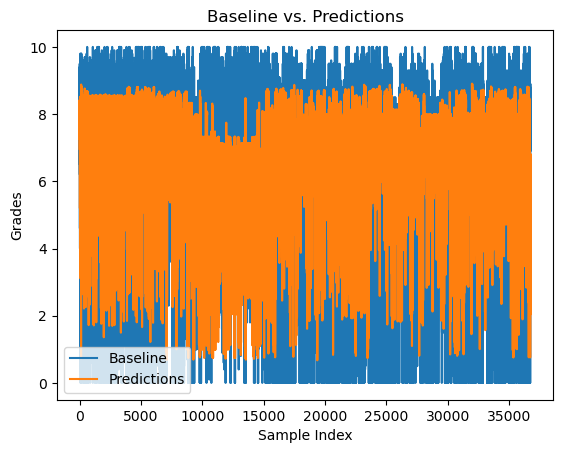

In [379]:
indices = range(len(Y_DL_TEST))

# Actual grades
plt.plot(indices, Y_DL_TEST, label='Baseline')

# Plot predictions
plt.plot(indices, y_pred_rnn, label='Predictions')

plt.xlabel('Sample Index')
plt.ylabel('Grades')
plt.title('Baseline vs. Predictions')
plt.legend()
plt.show()

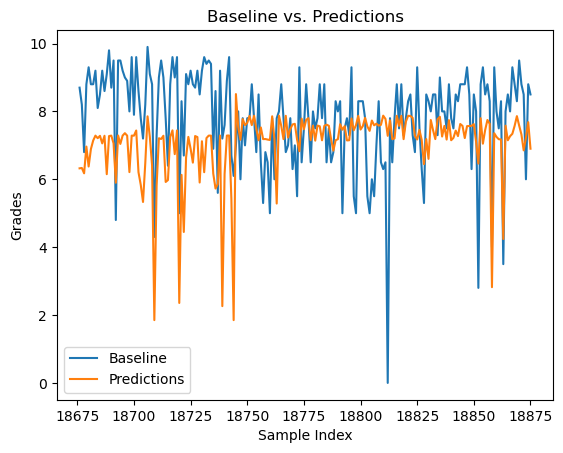

In [380]:
# Index for plotting
start_index = len(Y_DL_TEST) // 2 + 300
end_index = start_index + 200

indices = range(start_index, end_index)

# Actual grades
plt.plot(indices, Y_DL_TEST[start_index:end_index], label='Baseline')

# Plot predictions
plt.plot(indices, y_pred_rnn[start_index:end_index], label='Predictions')


plt.xlabel('Sample Index')
plt.ylabel('Grades')
plt.title('Baseline vs. Predictions')
plt.legend()
plt.show()

### Result

In [381]:
y_pred_rnn = np.reshape(y_pred_rnn, y_pred_rnn.shape[0])

In [382]:
y_pred_rnn

array([6.966261 , 8.164571 , 7.982221 , ..., 6.5003285, 6.814433 ,
       4.95318  ], dtype=float32)

In [383]:
# Lưu vào results
results['Neural Network'] = y_pred_rnn

In [384]:
results

,mssv,mamh,Actual,Linear Regression,Lasso Regression,Decision Tree Regression,XGboost Regression,Neural Network
0,7173CAB9XPvAibaEXe+FmCcjrTpCnh0Ew0W3y7lQ,SS006,7.8,7.786411,7.801686,8.022388,8.179381,6.966261
1,4A7B8A4FXPvAibaEXe8EoEN8tkksyeIVJ31zhbN0,IT005,8.4,7.783887,7.896503,8.545441,8.086429,8.164571
2,BC652119XPvAibaEXe+AmvzHTDc+b21IQEdKLFj1,IT005,8.9,7.623864,7.734915,8.162253,7.904126,7.982221
3,CC824C78XPvAibaEXe+AmvzHTDc+b1JUJRofi29e,IT005,8.5,7.276892,7.384091,7.509095,7.409752,7.514516
4,39B39397XPvAibaEXe/vGZ1xWLvpK7wMZlgBlCBs,IT005,9.4,8.664693,8.787143,9.528786,9.187186,8.422590
...,...,...,...,...,...,...,...,...
36748,78F971C7XPvAibaEXe/qyMkGG2RlFrgIY6/9Nnnk,IE101,7.6,6.081543,6.088920,6.010289,6.116238,4.711946
36749,35A4B1C2XPvAibaEXe/VxWgTgtHe07+vkN6++USd,IE101,7.9,8.261587,8.296242,8.593380,8.509970,6.513196
36750,7CDE61ABXPvAibaEXe/VxWgTgtHe04Encl5UmaMi,IE101,8.1,8.275000,8.309966,8.787280,8.509970,6.500329
36751,658FB4D5XPvAibaEXe/VxWgTgtHe02gf1ImYGwpE,IE101,6.9,7.981626,8.012859,8.162253,8.106074,6.814433


## Recommendation System

In [390]:
from surprise import accuracy
from surprise import SVD, SVDpp, KNNBasic
from surprise import Dataset
from surprise import NormalPredictor
from surprise import Reader
from surprise import KNNWithMeans
from surprise.model_selection import cross_validate,train_test_split, GridSearchCV

### Collaborative-based-performance

#### Preprocessing

In [403]:
train_df = pd.read_csv('data/Recommendation System/train_df_cf.csv')
test_df = RS_TEST

In [404]:
jan01_rows = test_df[test_df['mamh'] == 'JAN01']
jan01_rows

,mssv,mamh,mean_diem_hp
23356,ABB32A53XPvAibaEXe8LPxrujEz9HjHEIsCz+RYQ,JAN01,9.5
23357,781446B1XPvAibaEXe8LPxrujEz9Hs1xTTATW9++,JAN01,7.6
23358,B8DA3A1FXPvAibaEXe+kERJkYCVZqkYuVZDICsM5,JAN01,3.7
23359,990F4936XPvAibaEXe+4UdF7idt72D2UbcvOKM/y,JAN01,9.4
23360,D2DCE054XPvAibaEXe9N6c4SmCoWIAXcRgpOF4vY,JAN01,9.1
...,...,...,...
23477,867D2F1CXPvAibaEXe8S9yNq1cVJjKxG8Dbh1z2O,JAN01,8.8
23478,5F1C3B4AXPvAibaEXe+551daa8DfJ3jiDcau4opE,JAN01,6.6
23479,CEBC2109XPvAibaEXe+551daa8DfJ7ysh9nuMnRk,JAN01,7.4
23480,DA1A7A0BXPvAibaEXe+sfYgLIH7gO6ughF/VjQvN,JAN01,9.2


In [ ]:
# from sklearn.preprocessing import LabelEncoder

# encoder = LabelEncoder()

# train_df['mssv'] = encoder.fit_transform(train_df['mssv'])
# train_df['mamh'] = encoder.fit_transform(train_df['mamh'])

In [405]:
ratings_array = train_df['mean_diem_hp'].unique()
max_rating = np.amax( ratings_array )
min_rating = np.amin( ratings_array )
print( max_rating, min_rating )

12.0 0.0


In [406]:
features = ['mssv','mamh', 'mean_diem_hp']
reader = Reader(rating_scale=(min_rating, max_rating))
data = Dataset.load_from_df(train_df[features], reader)

#### Algorithm 2

In [407]:
# Use the famous SVD algorithm
algo = SVD()

# Run 7-fold cross-validation and then print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=7, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 7 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Mean    Std     
RMSE (testset)    1.4973  1.4907  1.4764  1.4931  1.4851  1.4871  1.4907  1.4886  0.0062  
MAE (testset)     1.0835  1.0818  1.0721  1.0824  1.0771  1.0787  1.0803  1.0794  0.0036  
Fit time          5.47    5.95    5.47    5.53    5.25    5.43    5.41    5.50    0.20    
Test time         0.56    0.45    0.59    1.19    0.46    0.46    1.20    0.70    0.32    


{'test_rmse': array([1.4972978 , 1.49067989, 1.4763753 , 1.4930569 , 1.48512297,
        1.48707967, 1.49069742]),
 'test_mae': array([1.0835258 , 1.08175104, 1.07212557, 1.08243642, 1.07710562,
        1.07873431, 1.08034934]),
 'fit_time': (5.471642732620239,
  5.949640274047852,
  5.4697089195251465,
  5.532729864120483,
  5.246540546417236,
  5.4258763790130615,
  5.412234783172607),
 'test_time': (0.5602803230285645,
  0.45183587074279785,
  0.5941975116729736,
  1.194678783416748,
  0.4619286060333252,
  0.463886022567749,
  1.1998438835144043)}

In [399]:
data_train = data.build_full_trainset()
algo.fit(data_train)

In [418]:
testset = list(zip(test_df['mssv'], test_df['mamh'], test_df['mean_diem_hp']))

# Test the model on the test set
predictions = algo.test(testset)
# Calculate RMSE
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)
print('RMSE:', rmse)
print('MAE:', mae)

RMSE: 1.7392
MAE:  1.2078
RMSE: 1.7391644520062661
MAE: 1.207761135230812


In [419]:
results['Algo2'] = test_df.apply(lambda x: algo.predict(x[0],x[1]).est, axis=1)

#### Algorithm 3

In [408]:
sim_options = {
    "name": ["msd"], #"cosine"
    "min_support": [5], # 3,4
    "user_based": [False, True],
}

param_grid = {"sim_options": sim_options}

gs = GridSearchCV(KNNWithMeans, param_grid, measures=["rmse", "mae"], cv=5)
gs.fit(data)

print(gs.best_score["rmse"])
print(gs.best_params["rmse"])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
1.4761326907044574
{'sim_options': {'name': 'msd', 'min_support': 5, 'user_based': True}}


In [409]:
best_params = gs.best_params['rmse']
model_svd = gs.best_estimator['rmse']
model_svd.fit(data.build_full_trainset())

Computing the msd similarity matrix...
Done computing similarity matrix.


In [416]:
# Make predictions on the test set

# Convert the test set to a list of (user, item, rating) tuples
testset = list(zip(test_df['mssv'], test_df['mamh'], test_df['mean_diem_hp']))

# Test the model on the test set
predictions = model_svd.test(testset)
# Calculate RMSE
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)
print('RMSE:', rmse)
print('MAE:', mae)

RMSE: 1.7236
MAE:  1.1955
RMSE: 1.7235524166319118
MAE: 1.1955238147435299


In [421]:
results['Algo3'] = test_df.apply(lambda x: model_svd.predict(x[0],x[1]).est, axis=1)

In [422]:
results

,mssv,mamh,Actual,Linear Regression,Lasso Regression,Decision Tree Regression,XGboost Regression,Neural Network,Algo2,Algo3
0,7173CAB9XPvAibaEXe+FmCcjrTpCnh0Ew0W3y7lQ,SS006,7.8,7.786411,7.801686,8.022388,8.179381,6.966261,6.816644,6.825719
1,4A7B8A4FXPvAibaEXe8EoEN8tkksyeIVJ31zhbN0,IT005,8.4,7.783887,7.896503,8.545441,8.086429,8.164571,8.058491,8.500000
2,BC652119XPvAibaEXe+AmvzHTDc+b21IQEdKLFj1,IT005,8.9,7.623864,7.734915,8.162253,7.904126,7.982221,7.740547,8.200000
3,CC824C78XPvAibaEXe+AmvzHTDc+b1JUJRofi29e,IT005,8.5,7.276892,7.384091,7.509095,7.409752,7.514516,7.605346,7.975000
4,39B39397XPvAibaEXe/vGZ1xWLvpK7wMZlgBlCBs,IT005,9.4,8.664693,8.787143,9.528786,9.187186,8.422590,8.249774,9.275000
...,...,...,...,...,...,...,...,...,...,...
36748,78F971C7XPvAibaEXe/qyMkGG2RlFrgIY6/9Nnnk,IE101,7.6,6.081543,6.088920,6.010289,6.116238,4.711946,7.294065,6.825719
36749,35A4B1C2XPvAibaEXe/VxWgTgtHe07+vkN6++USd,IE101,7.9,8.261587,8.296242,8.593380,8.509970,6.513196,7.294065,6.825719
36750,7CDE61ABXPvAibaEXe/VxWgTgtHe04Encl5UmaMi,IE101,8.1,8.275000,8.309966,8.787280,8.509970,6.500329,7.294065,6.825719
36751,658FB4D5XPvAibaEXe/VxWgTgtHe02gf1ImYGwpE,IE101,6.9,7.981626,8.012859,8.162253,8.106074,6.814433,7.294065,6.825719


#### Predict

RMSE: 1.7200761400184608


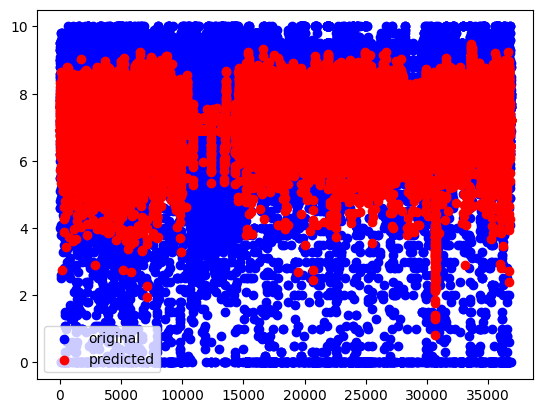

In [ ]:
# assuming df is your pandas DataFrame object
col1 = test_df['Algo2']#['Algo3']
col2 = test_df['mean_diem_hp']

# drop any rows that are in one column but not the other
col1 = col1[col1.index.isin(col2.index)]
col2 = col2[col2.index.isin(col1.index)]

rmse = np.sqrt(mean_squared_error(col1, col2))

print("RMSE:", rmse)

plt.scatter(col2.index, col2, color="blue", label="original")
plt.scatter(col1.index, col1, color="red", label="predicted")
plt.legend()
plt.show() 

### Content-based

#### Course base

In [423]:
monhoc_df_original = pd.read_csv('data/Recommendation System/MONHOC.csv')

In [424]:
monhoc_df = monhoc_df_original.copy()

In [425]:
monhoc_df

,mamh,sl_thuong,sl_trano,sl_caithien,diemtb,sotc,monchung,KHMT,CNPM,HTTT,...,slsvhk_thu_18,slsvhk_thu_19,slsvhk_thu_20,slsvhk_thu_21,slsvhk_thu_22,slsvhk_thu_23,slsvhk_thu_24,slsvhk_thu_25,slsvhk_thu_26,slsvhk_thu_27
0,ACCT5123,164,0,0,7.2384,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,ADENG1,114,2,2,5.0054,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ADENG2,87,2,0,4.3496,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ADENG3,19,0,0,7.0000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,AI001,27,0,0,9.2593,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,STAT3013,218,5,0,6.8381,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
635,STAT4033,375,9,0,7.0486,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
636,VCPH1,5,0,0,7.7000,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
637,VCPL1,3530,244,44,5.9919,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [426]:
# Get the header list of the DataFrame
header_list = monhoc_df.columns.tolist()

# Print the header list
print(header_list)

['mamh', 'sl_thuong', 'sl_trano', 'sl_caithien', 'diemtb', 'sotc', 'monchung', 'KHMT', 'CNPM', 'HTTT', 'MMT', 'KTMT', 'KTTT', 'slsvhk_thu_1', 'slsvhk_thu_2', 'slsvhk_thu_3', 'slsvhk_thu_4', 'slsvhk_thu_5', 'slsvhk_thu_6', 'slsvhk_thu_7', 'slsvhk_thu_8', 'slsvhk_thu_9', 'slsvhk_thu_10', 'slsvhk_thu_11', 'slsvhk_thu_12', 'slsvhk_thu_13', 'slsvhk_thu_14', 'slsvhk_thu_15', 'slsvhk_thu_16', 'slsvhk_thu_17', 'slsvhk_thu_18', 'slsvhk_thu_19', 'slsvhk_thu_20', 'slsvhk_thu_21', 'slsvhk_thu_22', 'slsvhk_thu_23', 'slsvhk_thu_24', 'slsvhk_thu_25', 'slsvhk_thu_26', 'slsvhk_thu_27']


In [429]:
minmax_scaler = MinMaxScaler()
scaled_courses = minmax_scaler.fit_transform(monhoc_df[['sl_thuong','sl_trano', 'sl_caithien', 'diemtb', 'sotc', 'slsvhk_thu_1', 'slsvhk_thu_2', 'slsvhk_thu_3', 'slsvhk_thu_4', 'slsvhk_thu_5', 'slsvhk_thu_6', 'slsvhk_thu_7', 'slsvhk_thu_8', 'slsvhk_thu_9', 'slsvhk_thu_10', 'slsvhk_thu_11', 'slsvhk_thu_12', 'slsvhk_thu_13', 'slsvhk_thu_14', 'slsvhk_thu_15', 'slsvhk_thu_16', 'slsvhk_thu_17', 'slsvhk_thu_18', 'slsvhk_thu_19', 'slsvhk_thu_20', 'slsvhk_thu_21', 'slsvhk_thu_22', 'slsvhk_thu_23', 'slsvhk_thu_24', 'slsvhk_thu_25', 'slsvhk_thu_26', 'slsvhk_thu_27']])

In [430]:
monhoc_df['sl_thuong'] = scaled_courses[:,0]
monhoc_df['sl_trano'] = scaled_courses[:,1]
monhoc_df['sl_caithien'] = scaled_courses[:,2]
monhoc_df['diemtb'] = scaled_courses[:,3]
monhoc_df['sotc'] = scaled_courses[:,4]
monhoc_df['slsvhk_thu_1'] = scaled_courses[:,5]
monhoc_df['slsvhk_thu_2'] = scaled_courses[:,6]
monhoc_df['slsvhk_thu_3'] = scaled_courses[:,7]
monhoc_df['slsvhk_thu_4'] = scaled_courses[:,8]
monhoc_df['slsvhk_thu_5'] = scaled_courses[:,9]
monhoc_df['slsvhk_thu_6'] = scaled_courses[:,10]
monhoc_df['slsvhk_thu_7'] = scaled_courses[:,11]
monhoc_df['slsvhk_thu_8'] = scaled_courses[:,12]
monhoc_df['slsvhk_thu_9'] = scaled_courses[:,13]
monhoc_df['slsvhk_thu_10'] = scaled_courses[:,14]
monhoc_df['slsvhk_thu_11'] = scaled_courses[:,15]
monhoc_df['slsvhk_thu_12'] = scaled_courses[:,16]
monhoc_df['slsvhk_thu_13'] = scaled_courses[:,17]
monhoc_df['slsvhk_thu_14'] = scaled_courses[:,18]
monhoc_df['slsvhk_thu_15'] = scaled_courses[:,19]
monhoc_df['slsvhk_thu_16'] = scaled_courses[:,20]
monhoc_df['slsvhk_thu_17'] = scaled_courses[:,21]
monhoc_df['slsvhk_thu_18'] = scaled_courses[:,22]
monhoc_df['slsvhk_thu_19'] = scaled_courses[:,23]
monhoc_df['slsvhk_thu_20'] = scaled_courses[:,24]
monhoc_df['slsvhk_thu_21'] = scaled_courses[:,25]
monhoc_df['slsvhk_thu_22'] = scaled_courses[:,26]
monhoc_df['slsvhk_thu_23'] = scaled_courses[:,27]
monhoc_df['slsvhk_thu_24'] = scaled_courses[:,28]
monhoc_df['slsvhk_thu_25'] = scaled_courses[:,29]
monhoc_df['slsvhk_thu_26'] = scaled_courses[:,30]
monhoc_df['slsvhk_thu_27'] = scaled_courses[:,31]
monhoc_df

,mamh,sl_thuong,sl_trano,sl_caithien,diemtb,sotc,monchung,KHMT,CNPM,HTTT,...,slsvhk_thu_18,slsvhk_thu_19,slsvhk_thu_20,slsvhk_thu_21,slsvhk_thu_22,slsvhk_thu_23,slsvhk_thu_24,slsvhk_thu_25,slsvhk_thu_26,slsvhk_thu_27
0,ACCT5123,0.011722,0.000000,0.000000,0.779286,0.046875,0,0,0,1,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ADENG1,0.008148,0.000547,0.005814,0.538881,0.000000,1,0,0,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ADENG2,0.006218,0.000547,0.000000,0.468278,0.000000,1,0,0,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ADENG3,0.001358,0.000000,0.000000,0.753620,0.000000,1,0,0,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AI001,0.001930,0.000000,0.000000,0.996856,0.015625,0,0,0,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,STAT3013,0.015581,0.001368,0.000000,0.736190,0.046875,0,0,0,1,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
635,STAT4033,0.026803,0.002462,0.000000,0.758852,0.046875,0,0,0,1,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
636,VCPH1,0.000357,0.000000,0.000000,0.828982,0.062500,1,0,0,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
637,VCPL1,0.252305,0.066740,0.127907,0.645088,0.046875,1,0,0,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#monhoc_df['dokho_chung'] = monhoc_df[['sl_trano','sl_caithien','sotc', 'dokho' ]].apply(lambda x : (x[0]*3 + x[1]*2 + x[2] + x[3])/7, axis=1)

In [431]:
mask = monhoc_df.isnull().any(axis=1)

# Use the mask to select only the rows with at least one NaN
rows_with_nan = monhoc_df[mask]

# Print the resulting DataFrame
print(rows_with_nan)

Empty DataFrame
Columns: [mamh, sl_thuong, sl_trano, sl_caithien, diemtb, sotc, monchung, KHMT, CNPM, HTTT, MMT, KTMT, KTTT, slsvhk_thu_1, slsvhk_thu_2, slsvhk_thu_3, slsvhk_thu_4, slsvhk_thu_5, slsvhk_thu_6, slsvhk_thu_7, slsvhk_thu_8, slsvhk_thu_9, slsvhk_thu_10, slsvhk_thu_11, slsvhk_thu_12, slsvhk_thu_13, slsvhk_thu_14, slsvhk_thu_15, slsvhk_thu_16, slsvhk_thu_17, slsvhk_thu_18, slsvhk_thu_19, slsvhk_thu_20, slsvhk_thu_21, slsvhk_thu_22, slsvhk_thu_23, slsvhk_thu_24, slsvhk_thu_25, slsvhk_thu_26, slsvhk_thu_27]
Index: []

[0 rows x 40 columns]


In [432]:
X_course = monhoc_df.iloc[:, 1:]
indices = pd.Series(monhoc_df.index, index=monhoc_df['mamh'])

In [433]:
# Assuming you have already vectorized your data into a matrix called "X"
# Calculate the cosine similarity matrix
cosine_sim = cosine_similarity(X_course)

# Print the cosine similarity between row 0 and row 1
print(cosine_sim[0][1])

0.28965272125224184


In [434]:
def get_recommendations_course(mamh, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[mamh]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:10]
    

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    monhoc_df_tem = monhoc_df_original.iloc[movie_indices]
        
    monhoc_df_tem["sim_score"] = [i[1] for i in sim_scores]

    # Return the top 10 most similar movies
    return monhoc_df_tem

In [435]:
get_recommendations_course('NT118')

C:\Users\Admin\AppData\Local\Temp\ipykernel_25368\693360518.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monhoc_df_tem["sim_score"] = [i[1] for i in sim_scores]


,mamh,sl_thuong,sl_trano,sl_caithien,diemtb,sotc,monchung,KHMT,CNPM,HTTT,...,slsvhk_thu_19,slsvhk_thu_20,slsvhk_thu_21,slsvhk_thu_22,slsvhk_thu_23,slsvhk_thu_24,slsvhk_thu_25,slsvhk_thu_26,slsvhk_thu_27,sim_score
459,NT114,1630,128,2,7.4696,2,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0.937366
446,NT101,2777,138,10,7.1179,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.912925
454,NT109,1369,204,8,6.3845,3,0,0,0,0,...,1,2,0,0,0,0,0,0,0,0.905258
474,NT204,1058,26,0,7.3482,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.883844
497,NT330,1021,43,0,7.1307,3,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0.872782
501,NT334,1110,15,0,7.5310,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.864193
458,NT113,1788,121,0,6.4299,3,0,0,0,0,...,1,2,0,0,0,0,0,0,0,0.863052
467,NT131,1218,52,1,7.0324,4,0,0,0,0,...,2,1,0,2,0,0,0,0,0,0.861093
462,NT117,607,62,0,7.1592,2,0,0,0,0,...,2,0,0,1,0,0,0,0,0,0.859298


In [436]:
print(cosine_sim[463][458])

0.8630515456173744


#### Student base

In [437]:
sinhvien_df_original = pd.read_csv('data/Recommendation System/SINHVIEN.csv')


In [438]:
sinhvien_df = sinhvien_df_original.copy()

In [439]:
sinhvien_df

,mssv,CNPM,HTTT,KHMT,KTMT,KTTT,MMT&TT,dtbhk_thu_1,dtbhk_thu_2,dtbhk_thu_3,...,sotchk_thu_19,sotchk_thu_20,sotchk_thu_21,sotchk_thu_22,sotchk_thu_23,sotchk_thu_24,sotchk_thu_25,sotchk_thu_26,sotchk_thu_27,dtbtl
0,0000AC05XPvAibaEXe9B2tolTZ0JLoBGbkQixQS6,0,0,0,0,0,0,7.816667,8.250000,7.660000,...,0,0,0,0,0,0,0,0,0,7.089474
1,0001EB57XPvAibaEXe/twT+sf632fUXnsgPGeB4G,0,1,0,0,0,0,6.412500,8.885714,9.000000,...,0,0,0,0,0,0,0,0,0,8.259524
2,00046394XPvAibaEXe+fmxcqgvribEcT4YmJhSFD,0,0,0,1,0,0,5.857143,7.300000,7.750000,...,0,0,0,0,0,0,0,0,0,7.293478
3,0006A0BBXPvAibaEXe/lMOwHQdw54DgUkWaqwb1u,0,0,0,0,0,0,4.600000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,4.600000
4,000AD0D8XPvAibaEXe+RQyZpP6sq6qqIPZXybx3Q,1,0,0,0,0,0,9.033333,8.271429,8.340000,...,0,0,0,0,0,0,0,0,0,8.046667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17876,FFEF294AXPvAibaEXe/ceziXFRXnLc/x/K0hVw4d,0,0,0,0,1,0,4.450000,6.633333,8.600000,...,0,0,0,0,0,0,0,0,0,6.786364
17877,FFF3D630XPvAibaEXe8byJxgVsE7R2dP7ICEdFWK,0,0,0,0,0,0,8.833333,7.937500,8.000000,...,0,0,0,0,0,0,0,0,0,8.295652
17878,FFF4CD57XPvAibaEXe/z8kRiyNmKNla425pm0Qmc,0,0,0,0,0,0,7.671429,7.337500,7.500000,...,0,0,0,0,0,0,0,0,0,7.495000
17879,FFFA4234XPvAibaEXe+OhmjSj4XEzdTGgcTdT9fT,0,0,0,0,0,1,7.757143,7.114286,7.550000,...,0,0,0,0,0,0,0,0,0,7.728889


In [440]:
# Get the header list of the DataFrame
header_list = sinhvien_df.columns.tolist()

# Print the header list
print(header_list)

['mssv', 'CNPM', 'HTTT', 'KHMT', 'KTMT', 'KTTT', 'MMT&TT', 'dtbhk_thu_1', 'dtbhk_thu_2', 'dtbhk_thu_3', 'dtbhk_thu_4', 'dtbhk_thu_5', 'dtbhk_thu_6', 'dtbhk_thu_7', 'dtbhk_thu_8', 'dtbhk_thu_9', 'dtbhk_thu_10', 'dtbhk_thu_11', 'dtbhk_thu_12', 'dtbhk_thu_13', 'dtbhk_thu_14', 'dtbhk_thu_15', 'dtbhk_thu_16', 'dtbhk_thu_17', 'dtbhk_thu_18', 'dtbhk_thu_19', 'dtbhk_thu_20', 'dtbhk_thu_21', 'dtbhk_thu_22', 'dtbhk_thu_23', 'dtbhk_thu_24', 'dtbhk_thu_25', 'dtbhk_thu_26', 'dtbhk_thu_27', 'sotchk_thu_1', 'sotchk_thu_2', 'sotchk_thu_3', 'sotchk_thu_4', 'sotchk_thu_5', 'sotchk_thu_6', 'sotchk_thu_7', 'sotchk_thu_8', 'sotchk_thu_9', 'sotchk_thu_10', 'sotchk_thu_11', 'sotchk_thu_12', 'sotchk_thu_13', 'sotchk_thu_14', 'sotchk_thu_15', 'sotchk_thu_16', 'sotchk_thu_17', 'sotchk_thu_18', 'sotchk_thu_19', 'sotchk_thu_20', 'sotchk_thu_21', 'sotchk_thu_22', 'sotchk_thu_23', 'sotchk_thu_24', 'sotchk_thu_25', 'sotchk_thu_26', 'sotchk_thu_27', 'dtbtl']


In [441]:
minmax_scaler = MinMaxScaler()
scaled_students = minmax_scaler.fit_transform(sinhvien_df[['dtbhk_thu_1', 'dtbhk_thu_2', 'dtbhk_thu_3', 'dtbhk_thu_4', 'dtbhk_thu_5', 'dtbhk_thu_6', 'dtbhk_thu_7', 'dtbhk_thu_8', 'dtbhk_thu_9', 'dtbhk_thu_10', 'dtbhk_thu_11', 'dtbhk_thu_12', 'dtbhk_thu_13', 'dtbhk_thu_14', 'dtbhk_thu_15', 'dtbhk_thu_16', 'dtbhk_thu_17', 'dtbhk_thu_18', 'dtbhk_thu_19', 'dtbhk_thu_20', 'dtbhk_thu_21', 'dtbhk_thu_22','dtbhk_thu_23', 'dtbhk_thu_24', 'dtbhk_thu_25', 'dtbhk_thu_26', 'dtbhk_thu_27', 'sotchk_thu_1', 'sotchk_thu_2', 'sotchk_thu_3', 'sotchk_thu_4', 'sotchk_thu_5', 'sotchk_thu_6', 'sotchk_thu_7', 'sotchk_thu_8', 'sotchk_thu_9', 'sotchk_thu_10', 'sotchk_thu_11', 'sotchk_thu_12', 'sotchk_thu_13', 'sotchk_thu_14', 'sotchk_thu_15', 'sotchk_thu_16', 'sotchk_thu_17', 'sotchk_thu_18', 'sotchk_thu_19', 'sotchk_thu_20', 'sotchk_thu_21', 'sotchk_thu_22', 'sotchk_thu_23', 'sotchk_thu_24', 'sotchk_thu_25', 'sotchk_thu_26', 'sotchk_thu_27', 'dtbtl']])

In [442]:
#sinhvien_df['drl'] = scaled_students[:,0]
sinhvien_df['dtbhk_thu_1'] = scaled_students[:,0]
sinhvien_df['dtbhk_thu_2'] = scaled_students[:,1]
sinhvien_df['dtbhk_thu_3'] = scaled_students[:,2]
sinhvien_df['dtbhk_thu_4'] = scaled_students[:,3]
sinhvien_df['dtbhk_thu_5'] = scaled_students[:,4]
sinhvien_df['dtbhk_thu_6'] = scaled_students[:,5]
sinhvien_df['dtbhk_thu_7'] = scaled_students[:,6]
sinhvien_df['dtbhk_thu_8'] = scaled_students[:,7]
sinhvien_df['dtbhk_thu_9'] = scaled_students[:,8]
sinhvien_df['dtbhk_thu_10'] = scaled_students[:,9]
sinhvien_df['dtbhk_thu_11'] = scaled_students[:,10]
sinhvien_df['dtbhk_thu_12'] = scaled_students[:,11]
sinhvien_df['dtbhk_thu_13'] = scaled_students[:,12]
sinhvien_df['dtbhk_thu_14'] = scaled_students[:,13]
sinhvien_df['dtbhk_thu_15'] = scaled_students[:,14]
sinhvien_df['dtbhk_thu_16'] = scaled_students[:,15]
sinhvien_df['dtbhk_thu_17'] = scaled_students[:,16]
sinhvien_df['dtbhk_thu_18'] = scaled_students[:,17]
sinhvien_df['dtbhk_thu_19'] = scaled_students[:,18]
sinhvien_df['dtbhk_thu_20'] = scaled_students[:,19]
sinhvien_df['dtbhk_thu_21'] = scaled_students[:,20]
sinhvien_df['dtbhk_thu_22'] = scaled_students[:,21]
sinhvien_df['dtbhk_thu_23'] = scaled_students[:,22]
sinhvien_df['dtbhk_thu_24'] = scaled_students[:,23]
sinhvien_df['dtbhk_thu_25'] = scaled_students[:,24]
sinhvien_df['dtbhk_thu_26'] = scaled_students[:,25]
sinhvien_df['dtbhk_thu_27'] = scaled_students[:,26]
sinhvien_df['sotchk_thu_1'] = scaled_students[:,27]
sinhvien_df['sotchk_thu_2'] = scaled_students[:,28]
sinhvien_df['sotchk_thu_3'] = scaled_students[:,29]
sinhvien_df['sotchk_thu_4'] = scaled_students[:,30]
sinhvien_df['sotchk_thu_5'] = scaled_students[:,31]
sinhvien_df['sotchk_thu_6'] = scaled_students[:,32]
sinhvien_df['sotchk_thu_7'] = scaled_students[:,33]
sinhvien_df['sotchk_thu_8'] = scaled_students[:,34]
sinhvien_df['sotchk_thu_9'] = scaled_students[:,35]
sinhvien_df['sotchk_thu_10'] = scaled_students[:,36]
sinhvien_df['sotchk_thu_11'] = scaled_students[:,37]
sinhvien_df['sotchk_thu_12'] = scaled_students[:,38]
sinhvien_df['sotchk_thu_13'] = scaled_students[:,39]
sinhvien_df['sotchk_thu_14'] = scaled_students[:,40]
sinhvien_df['sotchk_thu_15'] = scaled_students[:,41]
sinhvien_df['sotchk_thu_16'] = scaled_students[:,42]
sinhvien_df['sotchk_thu_17'] = scaled_students[:,43]
sinhvien_df['sotchk_thu_18'] = scaled_students[:,44]
sinhvien_df['sotchk_thu_19'] = scaled_students[:,45]
sinhvien_df['sotchk_thu_20'] = scaled_students[:,46]
sinhvien_df['sotchk_thu_21'] = scaled_students[:,47]
sinhvien_df['sotchk_thu_22'] = scaled_students[:,48]
sinhvien_df['sotchk_thu_23'] = scaled_students[:,49]
sinhvien_df['sotchk_thu_24'] = scaled_students[:,50]
sinhvien_df['sotchk_thu_25'] = scaled_students[:,51]
sinhvien_df['sotchk_thu_26'] = scaled_students[:,52]
sinhvien_df['sotchk_thu_27'] = scaled_students[:,53]
sinhvien_df['dtbtl'] = scaled_students[:,54]

In [ ]:
#sinhvien_df['diem'] = sinhvien_df[['drl','dtb']].apply(lambda x : (x[0] + x[1]*4)/5, axis=1)

In [443]:
sinhvien_df

,mssv,CNPM,HTTT,KHMT,KTMT,KTTT,MMT&TT,dtbhk_thu_1,dtbhk_thu_2,dtbhk_thu_3,...,sotchk_thu_19,sotchk_thu_20,sotchk_thu_21,sotchk_thu_22,sotchk_thu_23,sotchk_thu_24,sotchk_thu_25,sotchk_thu_26,sotchk_thu_27,dtbtl
0,0000AC05XPvAibaEXe9B2tolTZ0JLoBGbkQixQS6,0,0,0,0,0,0,0.805842,0.841837,0.766000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.730874
1,0001EB57XPvAibaEXe/twT+sf632fUXnsgPGeB4G,0,1,0,0,0,0,0.661082,0.906706,0.900000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.851497
2,00046394XPvAibaEXe+fmxcqgvribEcT4YmJhSFD,0,0,0,1,0,0,0.603829,0.744898,0.775000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.751905
3,0006A0BBXPvAibaEXe/lMOwHQdw54DgUkWaqwb1u,0,0,0,0,0,0,0.474227,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.474227
4,000AD0D8XPvAibaEXe+RQyZpP6sq6qqIPZXybx3Q,1,0,0,0,0,0,0.931271,0.844023,0.834000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.829553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17876,FFEF294AXPvAibaEXe/ceziXFRXnLc/x/K0hVw4d,0,0,0,0,1,0,0.458763,0.676871,0.860000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.699625
17877,FFF3D630XPvAibaEXe8byJxgVsE7R2dP7ICEdFWK,0,0,0,0,0,0,0.910653,0.809949,0.800000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.855222
17878,FFF4CD57XPvAibaEXe/z8kRiyNmKNla425pm0Qmc,0,0,0,0,0,0,0.790869,0.748724,0.750000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.772680
17879,FFFA4234XPvAibaEXe+OhmjSj4XEzdTGgcTdT9fT,0,0,0,0,0,1,0.799705,0.725948,0.755000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.796793


In [444]:
mask = sinhvien_df.isnull().any(axis=1)

# Use the mask to select only the rows with at least one NaN
rows_with_nan = sinhvien_df[mask]

# Print the resulting DataFrame
print(rows_with_nan)

Empty DataFrame
Columns: [mssv, CNPM, HTTT, KHMT, KTMT, KTTT, MMT&TT, dtbhk_thu_1, dtbhk_thu_2, dtbhk_thu_3, dtbhk_thu_4, dtbhk_thu_5, dtbhk_thu_6, dtbhk_thu_7, dtbhk_thu_8, dtbhk_thu_9, dtbhk_thu_10, dtbhk_thu_11, dtbhk_thu_12, dtbhk_thu_13, dtbhk_thu_14, dtbhk_thu_15, dtbhk_thu_16, dtbhk_thu_17, dtbhk_thu_18, dtbhk_thu_19, dtbhk_thu_20, dtbhk_thu_21, dtbhk_thu_22, dtbhk_thu_23, dtbhk_thu_24, dtbhk_thu_25, dtbhk_thu_26, dtbhk_thu_27, sotchk_thu_1, sotchk_thu_2, sotchk_thu_3, sotchk_thu_4, sotchk_thu_5, sotchk_thu_6, sotchk_thu_7, sotchk_thu_8, sotchk_thu_9, sotchk_thu_10, sotchk_thu_11, sotchk_thu_12, sotchk_thu_13, sotchk_thu_14, sotchk_thu_15, sotchk_thu_16, sotchk_thu_17, sotchk_thu_18, sotchk_thu_19, sotchk_thu_20, sotchk_thu_21, sotchk_thu_22, sotchk_thu_23, sotchk_thu_24, sotchk_thu_25, sotchk_thu_26, sotchk_thu_27, dtbtl]
Index: []

[0 rows x 62 columns]


In [445]:
X_student = sinhvien_df.iloc[:, 1:]
indices_student = pd.Series(sinhvien_df.index, index=sinhvien_df['mssv'])

In [446]:
X_student

,CNPM,HTTT,KHMT,KTMT,KTTT,MMT&TT,dtbhk_thu_1,dtbhk_thu_2,dtbhk_thu_3,dtbhk_thu_4,...,sotchk_thu_19,sotchk_thu_20,sotchk_thu_21,sotchk_thu_22,sotchk_thu_23,sotchk_thu_24,sotchk_thu_25,sotchk_thu_26,sotchk_thu_27,dtbtl
0,0,0,0,0,0,0,0.805842,0.841837,0.766000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.730874
1,0,1,0,0,0,0,0.661082,0.906706,0.900000,0.873333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.851497
2,0,0,0,1,0,0,0.603829,0.744898,0.775000,0.642857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.751905
3,0,0,0,0,0,0,0.474227,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.474227
4,1,0,0,0,0,0,0.931271,0.844023,0.834000,0.803333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.829553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17876,0,0,0,0,1,0,0.458763,0.676871,0.860000,0.666000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.699625
17877,0,0,0,0,0,0,0.910653,0.809949,0.800000,0.814286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.855222
17878,0,0,0,0,0,0,0.790869,0.748724,0.750000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.772680
17879,0,0,0,0,0,1,0.799705,0.725948,0.755000,0.790000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.796793


In [447]:
# Assuming you have already vectorized your data into a matrix called "X"
# Calculate the cosine similarity matrix
cosine_sim_student = cosine_similarity(X_student)

# Print the cosine similarity between row 0 and row 1
print(cosine_sim_student[0][1])

0.6392554094891943


In [449]:
def get_recommendations_student(mssv, cosine_sim=cosine_sim_student):
    # Get the index of the movie that matches the title
    idx = indices_student[mssv]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim_student[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:10]
    #print(sim_scores)

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    sinhvien_df_tem = sinhvien_df_original.iloc[movie_indices]
        
    sinhvien_df_tem["sim_score"] = [i[1] for i in sim_scores]
    # Return the top 10 most similar movies
    return sinhvien_df_tem

In [450]:
get_recommendations_student('001E045BXPvAibaEXe+n07P56kWx2N6EoOCUJBA4')

C:\Users\Admin\AppData\Local\Temp\ipykernel_25368\3114445421.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinhvien_df_tem["sim_score"] = [i[1] for i in sim_scores]


,mssv,CNPM,HTTT,KHMT,KTMT,KTTT,MMT&TT,dtbhk_thu_1,dtbhk_thu_2,dtbhk_thu_3,...,sotchk_thu_20,sotchk_thu_21,sotchk_thu_22,sotchk_thu_23,sotchk_thu_24,sotchk_thu_25,sotchk_thu_26,sotchk_thu_27,dtbtl,sim_score
1115,1045A78EXPvAibaEXe8dsW93DhIODCnZ4iYHgwM/,1,0,0,0,0,0,4.725000,4.566667,5.566667,...,0,0,0,0,0,0,0,0,4.629412,0.969856
14521,D0E42648XPvAibaEXe998fVikzcJIoP0RXJ8JPji,1,0,0,0,0,0,6.900000,4.257143,5.333333,...,0,0,0,0,0,0,0,0,5.300000,0.942088
12889,BA4E4FF3XPvAibaEXe/PXWJbNZLssGHuklm+SW0s,1,0,0,0,0,0,7.700000,4.214286,2.700000,...,0,0,0,0,0,0,0,0,5.403509,0.939740
3278,2F9BDB24XPvAibaEXe9n6M+kQhqu8vtdZtAucjId,1,0,0,0,0,0,6.428571,4.342857,3.583333,...,0,0,0,0,0,0,0,0,5.369118,0.933226
4426,407973B4XPvAibaEXe/UTqPTjBxFVu/QwKCE2S5w,1,0,0,0,0,0,6.900000,4.450000,3.750000,...,0,0,0,0,0,0,0,0,5.674627,0.932515
10828,9C9DF586XPvAibaEXe+GHNK19bpqC+R86WCu45mt,1,0,0,0,0,0,5.014286,1.450000,6.416667,...,0,0,0,0,0,0,0,0,5.185075,0.927123
9387,885D43C3XPvAibaEXe/9n4RXguPAYPCdAJhH+UNK,1,0,0,0,0,0,7.000000,1.442857,7.557143,...,0,0,0,0,0,0,0,0,6.023810,0.926870
1923,1C304906XPvAibaEXe9hSzSdeSAT0mSwgfXy9PeD,1,0,0,0,0,0,5.777778,3.700000,6.150000,...,0,0,0,0,0,0,0,0,5.806667,0.925014
4752,4555C74CXPvAibaEXe8UBGVVSBKSkjQKdKZAX7FE,1,0,0,0,0,0,6.066667,5.328571,4.900000,...,0,0,0,0,0,0,0,0,5.615000,0.924524


In [451]:
print(cosine_sim_student[13][4752])

0.9245244527050798


#### Predict By Average Performance

In [452]:
diem_df = pd.read_csv('data/Recommendation System/train_df_cf.csv')
test_df = RS_TEST
test_df['mamh'] = test_df['mamh'].astype(str)


In [453]:
student_id = '6BC6AB5CXPvAibaEXe+HzQxlRR1Wqkif9T6N0XEg'
course_id = 'CS231'

c_relate  = get_recommendations_course(course_id)
st_relate = get_recommendations_student(student_id)

C:\Users\Admin\AppData\Local\Temp\ipykernel_25368\693360518.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monhoc_df_tem["sim_score"] = [i[1] for i in sim_scores]
C:\Users\Admin\AppData\Local\Temp\ipykernel_25368\3114445421.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinhvien_df_tem["sim_score"] = [i[1] for i in sim_scores]


In [454]:
st_relate

,mssv,CNPM,HTTT,KHMT,KTMT,KTTT,MMT&TT,dtbhk_thu_1,dtbhk_thu_2,dtbhk_thu_3,...,sotchk_thu_20,sotchk_thu_21,sotchk_thu_22,sotchk_thu_23,sotchk_thu_24,sotchk_thu_25,sotchk_thu_26,sotchk_thu_27,dtbtl,sim_score
14645,D2B86842XPvAibaEXe/IOsuN/I5gh1/n8BawSvPr,0,0,1,0,0,0,8.542857,7.771429,8.220000,...,0,0,0,0,0,0,0,0,8.521622,0.998362
16963,F34E4020XPvAibaEXe8pd25OrRS+bVa2uJMwiE2i,0,0,1,0,0,0,8.216667,7.637500,8.333333,...,0,0,0,0,0,0,0,0,8.147500,0.997661
11941,ACD24623XPvAibaEXe+4OTPvnL5gP9Wlozq9UJSj,0,0,1,0,0,0,8.366667,6.314286,7.416667,...,0,0,0,0,0,0,0,0,7.631579,0.997548
14605,D219DCF4XPvAibaEXe/5DpC15pEkHdeH8PWtqIrl,0,0,1,0,0,0,8.700000,8.328571,8.500000,...,0,0,0,0,0,0,0,0,8.842105,0.997486
5507,5066E750XPvAibaEXe+RTFcnyQdP1gV8o5sqlLTq,0,0,1,0,0,0,7.142857,7.485714,7.728571,...,0,0,0,0,0,0,0,0,7.972500,0.997376
1212,11D78A98XPvAibaEXe8PDON+Luwt5VBOf2V3ZL2a,0,0,1,0,0,0,7.612500,7.814286,8.333333,...,0,0,0,0,0,0,0,0,8.323684,0.997317
15933,E4A2CA5FXPvAibaEXe/EbCJQv4uheBFQbvWbrhdc,0,0,1,0,0,0,8.600000,8.783333,8.050000,...,0,0,0,0,0,0,0,0,8.631579,0.997055
8074,74FB1661XPvAibaEXe/KVW+JfXJB/gIQRRB2yGEl,0,0,1,0,0,0,7.685714,7.000000,8.250000,...,0,0,0,0,0,0,0,0,7.870732,0.996867
17072,F4B4377AXPvAibaEXe/ZkCDd4JXTLkx5ZC8xkQl7,0,0,1,0,0,0,8.840000,8.314286,8.057143,...,0,0,0,0,0,0,0,0,8.621622,0.996805


In [455]:
c_relate

,mamh,sl_thuong,sl_trano,sl_caithien,diemtb,sotc,monchung,KHMT,CNPM,HTTT,...,slsvhk_thu_19,slsvhk_thu_20,slsvhk_thu_21,slsvhk_thu_22,slsvhk_thu_23,slsvhk_thu_24,slsvhk_thu_25,slsvhk_thu_26,slsvhk_thu_27,sim_score
100,CS111,1454,85,6,7.1182,4,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0.992471
99,CS110,918,48,4,6.8362,4,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.990588
188,CS519,747,19,0,7.1740,3,0,1,0,0,...,0,1,1,0,0,0,0,0,0,0.983773
141,CS336,652,20,0,6.6993,4,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0.983763
94,CS105,1218,124,5,6.9652,4,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0.981141
113,CS221,1330,43,0,7.4271,4,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0.980499
102,CS112,1706,181,3,6.5414,4,0,1,0,0,...,2,1,0,0,0,0,0,0,0,0.978224
112,CS217,522,32,0,6.6755,4,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.970264
176,CS4323,406,20,0,6.7035,3,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.969766


In [456]:
diem_list = []
# Filter diem_df by course_id
filtered_diem_df = diem_df[diem_df["mamh"] == course_id]

# Get a list of mssv values that are in both st_relate and filtered_diem_df
common_mssv = set(st_relate["mssv"]).intersection(filtered_diem_df["mssv"])

# Use loc to get the mean_diem_hp values for the common mssv values
diem_list = filtered_diem_df.loc[filtered_diem_df["mssv"].isin(common_mssv), "mean_diem_hp"].tolist()

In [457]:
np.mean(diem_list)

8.9375

In [458]:
diem_list_current = []
# Filter diem_df by student_id
filtered_diem_df = diem_df[diem_df["mssv"] == student_id]

# Use loc to get the mean_diem_hp values for the mamh values in c_relate
diem_list_current = filtered_diem_df.loc[filtered_diem_df["mamh"].isin(c_relate["mamh"]), "mean_diem_hp"].tolist()

In [459]:
np.mean(diem_list_current)

9.52

In [460]:
mean_st = st_relate['dtbtl'].mean()
mean_c = c_relate['diemtb'].mean()
print(mean_st)
print(mean_c)

8.284769146555554
6.9044888888888885


#### Evaluate

In [461]:
def predict_CB_s(student_id, course_id):
    try:
        c_relate  = get_recommendations_course(course_id)
    except SpecificException: # Replace SpecificException with the exception that may occur
        print(student_id,course_id)
        return None
  
    # Solution 2
    # Filter diem_df by student_id
    filtered_diem_df = diem_df.query("mssv == @student_id")
    
    merged_df = pd.merge(filtered_diem_df,c_relate,on="mamh")
    result_df = merged_df[["mamh", "mean_diem_hp", "sim_score"]]

    return np.sum(result_df["mean_diem_hp"] * result_df["sim_score"]) / np.sum(result_df["sim_score"])

In [462]:
predict_CB_s('C3714556XPvAibaEXe+l62icawnoYswrmeT6bxGq','MA003')

C:\Users\Admin\AppData\Local\Temp\ipykernel_25368\693360518.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monhoc_df_tem["sim_score"] = [i[1] for i in sim_scores]


7.979647177933966

In [463]:
def predict_CB_c(student_id, course_id):
    st_relate = None
    try:
        st_relate = get_recommendations_student(student_id)
    except SpecificException: # Replace SpecificException with the exception that may occur
        print(student_id,course_id)
        return None
    
    filtered_diem_df = diem_df.query("mamh == @course_id")
    merged_df = pd.merge(filtered_diem_df, st_relate, on="mssv")
    result_df = merged_df[["mssv", "mean_diem_hp", "sim_score"]]
    
    return np.sum(result_df["mean_diem_hp"] * result_df["sim_score"]) / np.sum(result_df["sim_score"])

In [464]:
predict_CB_c('4F5A9BB9XPvAibaEXe/bcCn8ANC28GDG/07C7RwI','IS207')

C:\Users\Admin\AppData\Local\Temp\ipykernel_25368\3114445421.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinhvien_df_tem["sim_score"] = [i[1] for i in sim_scores]


7.9

In [465]:
def predict_CB_mean_c(student_id, course_id):
    try:
        c_relate  = get_recommendations_course(course_id)
        
    except:
        print(student_id,course_id)
        return None
    diem_final = c_relate['diemtb'].mean()
    return diem_final

In [466]:
def predict_CB_mean_s(student_id, course_id):
    try:
        st_relate = get_recommendations_student(student_id)
        
    except:
        print(student_id,course_id)
        return None
    diem_final = st_relate['dtbtl'].mean()
    return diem_final


In [467]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
test_df['predicted_diemhp_course'] = test_df.apply(lambda x: predict_CB_c(x["mssv"], x["mamh"]) if (x.name + 1) % 500 != 0 else (print(x.name), None)[1], axis=1)

In [ ]:
test_df['predicted_diemhp_student'] = test_df.apply(lambda x: predict_CB_s(x["mssv"], x["mamh"]) if (x.name + 1) % 500 != 0 else (print(x.name), None)[1], axis=1)

In [472]:
# results['content-base'] = test_df['predicted_diemhp_student'] 

In [ ]:
# test_df['predicted_diemhp_mean_course'] = test_df.apply(lambda x: predict_CB_mean_c(x["mssv"], x["mamh"]) if (x.name + 1) % 500 != 0 else (print(x.name), None)[1], axis=1)
# test_df['predicted_diemhp_mean_student'] = test_df.apply(lambda x: predict_CB_mean_s(x["mssv"], x["mamh"]) if (x.name + 1) % 500 != 0 else (print(x.name), None)[1], axis=1)

# Xuất file Results

In [477]:
results

,mssv,mamh,Actual,Linear Regression,Lasso Regression,Decision Tree Regression,XGboost Regression,Neural Network,Algo2,Algo3
0,7173CAB9XPvAibaEXe+FmCcjrTpCnh0Ew0W3y7lQ,SS006,7.8,7.786411,7.801686,8.022388,8.179381,6.966261,6.816644,6.825719
1,4A7B8A4FXPvAibaEXe8EoEN8tkksyeIVJ31zhbN0,IT005,8.4,7.783887,7.896503,8.545441,8.086429,8.164571,8.058491,8.500000
2,BC652119XPvAibaEXe+AmvzHTDc+b21IQEdKLFj1,IT005,8.9,7.623864,7.734915,8.162253,7.904126,7.982221,7.740547,8.200000
3,CC824C78XPvAibaEXe+AmvzHTDc+b1JUJRofi29e,IT005,8.5,7.276892,7.384091,7.509095,7.409752,7.514516,7.605346,7.975000
4,39B39397XPvAibaEXe/vGZ1xWLvpK7wMZlgBlCBs,IT005,9.4,8.664693,8.787143,9.528786,9.187186,8.422590,8.249774,9.275000
...,...,...,...,...,...,...,...,...,...,...
36748,78F971C7XPvAibaEXe/qyMkGG2RlFrgIY6/9Nnnk,IE101,7.6,6.081543,6.088920,6.010289,6.116238,4.711946,7.294065,6.825719
36749,35A4B1C2XPvAibaEXe/VxWgTgtHe07+vkN6++USd,IE101,7.9,8.261587,8.296242,8.593380,8.509970,6.513196,7.294065,6.825719
36750,7CDE61ABXPvAibaEXe/VxWgTgtHe04Encl5UmaMi,IE101,8.1,8.275000,8.309966,8.787280,8.509970,6.500329,7.294065,6.825719
36751,658FB4D5XPvAibaEXe/VxWgTgtHe02gf1ImYGwpE,IE101,6.9,7.981626,8.012859,8.162253,8.106074,6.814433,7.294065,6.825719


In [478]:
results.to_csv('results.csv', index=False)